In [1]:
import numpy as np
import scipy.stats as sp
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.formula.api as smf
import statsmodels.api as sm
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
dfp = pd.read_csv("fp_data.csv")
dfp.drop('unnamed: 0', axis=1, inplace=True)
columns_to_drop = ['ln_strike_pr', 'ln_open', 'ln_high', 'ln_low', 'ln_close', 'ln_settle_pr', 'ln_val_inlakh', 'return', '3_120_days', '121_240_days', '241_365_days']
dfp.drop(columns=columns_to_drop, inplace=True)
dfp.head()

,industry,instrument,symbol,expiry_dt,strike_pr,option_typ,open,high,low,close,settle_pr,contracts,val_inlakh,open_int,chg_in_oi,timestamp,days_to_expiry,expiry_category
0,Financial Index,OPTIDX,BANKNIFTY,2020-09-03,21200.0,CE,2350.00,2504.55,2350.00,2504.55,2561.85,2,11.81,175,-25,2020-08-31,245,2.0
1,Financial Index,OPTIDX,BANKNIFTY,2020-09-03,21300.0,CE,2904.25,2904.25,2296.90,2296.90,2461.95,4,23.83,650,0,2020-08-31,245,2.0
2,Financial Index,OPTIDX,BANKNIFTY,2020-09-03,21500.0,CE,3717.35,3717.45,2019.05,2230.55,2230.55,82,505.86,6425,400,2020-08-31,245,2.0
3,Financial Index,OPTIDX,BANKNIFTY,2020-09-03,21600.0,CE,2275.20,2275.20,2275.20,2275.20,2162.65,1,5.96,750,25,2020-08-31,245,2.0
4,Financial Index,OPTIDX,BANKNIFTY,2020-09-03,21700.0,CE,2899.00,2899.00,1974.65,1974.65,2063.05,4,24.14,900,-25,2020-08-31,245,2.0


In [3]:
dfp

,industry,instrument,symbol,expiry_dt,strike_pr,option_typ,open,high,low,close,settle_pr,contracts,val_inlakh,open_int,chg_in_oi,timestamp,days_to_expiry,expiry_category
0,Financial Index,OPTIDX,BANKNIFTY,2020-09-03,21200.0,CE,2350.00,2504.55,2350.00,2504.55,2561.85,2,11.81,175,-25,2020-08-31,245,2.0
1,Financial Index,OPTIDX,BANKNIFTY,2020-09-03,21300.0,CE,2904.25,2904.25,2296.90,2296.90,2461.95,4,23.83,650,0,2020-08-31,245,2.0
2,Financial Index,OPTIDX,BANKNIFTY,2020-09-03,21500.0,CE,3717.35,3717.45,2019.05,2230.55,2230.55,82,505.86,6425,400,2020-08-31,245,2.0
3,Financial Index,OPTIDX,BANKNIFTY,2020-09-03,21600.0,CE,2275.20,2275.20,2275.20,2275.20,2162.65,1,5.96,750,25,2020-08-31,245,2.0
4,Financial Index,OPTIDX,BANKNIFTY,2020-09-03,21700.0,CE,2899.00,2899.00,1974.65,1974.65,2063.05,4,24.14,900,-25,2020-08-31,245,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1021249,Financial Services,OPTSTK,AXISBANK,2020-01-30,640.0,CE,115.00,115.00,115.00,115.00,127.60,1,9.06,3600,1200,2019-11-25,28,0.0
1021250,Financial Services,OPTSTK,AXISBANK,2020-01-30,800.0,CE,24.75,24.75,24.75,24.75,24.75,1,9.89,10800,1200,2019-11-25,28,0.0
1021251,Financial Services,OPTSTK,AXISBANK,2020-01-30,670.0,PE,13.80,13.80,13.75,13.75,11.35,8,65.64,13200,9600,2019-11-25,28,0.0
1021252,Manufacturing & Engineering,OPTSTK,BAJAJ-AUTO,2020-01-30,2850.0,PE,35.30,35.30,35.30,35.30,11.95,1,7.21,250,250,2019-11-25,28,0.0


In [4]:
earliest_date = dfp['timestamp'].min()
latest_date = dfp['timestamp'].max()

print("Earliest Date:", earliest_date)
print("Latest Date:", latest_date)

Earliest Date: 2019-11-25
Latest Date: 2020-08-31


In [5]:
est = dfp[(dfp['timestamp'] >= '2019-11-25') & (dfp['timestamp'] <= '2020-05-25')]

test = dfp[(dfp['timestamp'] >= '2020-05-26') & (dfp['timestamp'] <= '2020-08-31')]


In [6]:
est.groupby(['industry'])
est

,industry,instrument,symbol,expiry_dt,strike_pr,option_typ,open,high,low,close,settle_pr,contracts,val_inlakh,open_int,chg_in_oi,timestamp,days_to_expiry,expiry_category
447345,Financial Index,OPTIDX,BANKNIFTY,2020-05-28,13900.0,CE,3776.35,3776.35,3308.40,3329.20,3329.20,3,10.42,20,0,2020-05-22,147,1.0
447346,Financial Index,OPTIDX,BANKNIFTY,2020-05-28,14000.0,CE,3660.00,3766.65,3100.00,3242.80,3289.80,13,45.11,260,80,2020-05-22,147,1.0
447347,Financial Index,OPTIDX,BANKNIFTY,2020-05-28,14500.0,CE,2873.30,3286.50,2642.50,2642.50,2793.65,35,121.37,2520,-80,2020-05-22,147,1.0
447348,Financial Index,OPTIDX,BANKNIFTY,2020-05-28,15000.0,CE,2545.25,2736.30,2053.75,2179.90,2179.90,66,228.69,2580,-520,2020-05-22,147,1.0
447349,Financial Index,OPTIDX,BANKNIFTY,2020-05-28,15500.0,CE,2196.55,2288.30,1630.00,1640.00,1833.85,12,41.65,220,120,2020-05-22,147,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1021249,Financial Services,OPTSTK,AXISBANK,2020-01-30,640.0,CE,115.00,115.00,115.00,115.00,127.60,1,9.06,3600,1200,2019-11-25,28,0.0
1021250,Financial Services,OPTSTK,AXISBANK,2020-01-30,800.0,CE,24.75,24.75,24.75,24.75,24.75,1,9.89,10800,1200,2019-11-25,28,0.0
1021251,Financial Services,OPTSTK,AXISBANK,2020-01-30,670.0,PE,13.80,13.80,13.75,13.75,11.35,8,65.64,13200,9600,2019-11-25,28,0.0
1021252,Manufacturing & Engineering,OPTSTK,BAJAJ-AUTO,2020-01-30,2850.0,PE,35.30,35.30,35.30,35.30,11.95,1,7.21,250,250,2019-11-25,28,0.0


In [7]:
test.groupby("industry")
test

,industry,instrument,symbol,expiry_dt,strike_pr,option_typ,open,high,low,close,settle_pr,contracts,val_inlakh,open_int,chg_in_oi,timestamp,days_to_expiry,expiry_category
0,Financial Index,OPTIDX,BANKNIFTY,2020-09-03,21200.0,CE,2350.00,2504.55,2350.00,2504.55,2561.85,2,11.81,175,-25,2020-08-31,245,2.0
1,Financial Index,OPTIDX,BANKNIFTY,2020-09-03,21300.0,CE,2904.25,2904.25,2296.90,2296.90,2461.95,4,23.83,650,0,2020-08-31,245,2.0
2,Financial Index,OPTIDX,BANKNIFTY,2020-09-03,21500.0,CE,3717.35,3717.45,2019.05,2230.55,2230.55,82,505.86,6425,400,2020-08-31,245,2.0
3,Financial Index,OPTIDX,BANKNIFTY,2020-09-03,21600.0,CE,2275.20,2275.20,2275.20,2275.20,2162.65,1,5.96,750,25,2020-08-31,245,2.0
4,Financial Index,OPTIDX,BANKNIFTY,2020-09-03,21700.0,CE,2899.00,2899.00,1974.65,1974.65,2063.05,4,24.14,900,-25,2020-08-31,245,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447340,Media,OPTSTK,ZEEL,2020-06-25,150.0,PE,8.40,9.20,7.00,7.70,7.70,72,193.87,74800,23800,2020-05-26,175,1.0
447341,Media,OPTSTK,ZEEL,2020-06-25,160.0,PE,12.60,14.05,11.00,11.75,11.75,54,158.06,54400,35700,2020-05-26,175,1.0
447342,Media,OPTSTK,ZEEL,2020-06-25,170.0,PE,18.00,18.05,16.35,17.10,17.10,11,35.03,11900,10200,2020-05-26,175,1.0
447343,Media,OPTSTK,ZEEL,2020-06-25,180.0,PE,23.05,23.05,23.05,23.05,23.05,1,3.45,5100,0,2020-05-26,175,1.0


In [8]:
from statsmodels.tsa.stattools import adfuller

columns_to_test = ['strike_pr', 'close', 'settle_pr', 'contracts', 'val_inlakh', 'chg_in_oi', 'days_to_expiry']

for column in columns_to_test:
    adf_result = adfuller(est[column], maxlag=4, regression='ct')

    print(f'\nADF Statistic for \033[1m{column}:\033[0m', adf_result[0])
    print('p-value:', adf_result[1])
    print('Critical Values:')
    for key, value in adf_result[4].items():
        print(f'\t{key}: {value:.3f}')

    if adf_result[1] < 0.05:
        print(f"\033[1mReject the null hypothesis for {column} - the series is stationary.\033[0m")
    else:
        print(f"\033[1mFail to reject the null hypothesis for {column} - the series has a unit root and is non-stationary.\033[0m")



ADF Statistic for strike_pr: -72.61008133345285
p-value: 0.0
Critical Values:
	1%: -3.959
	5%: -3.410
	10%: -3.127
Reject the null hypothesis for strike_pr - the series is stationary.

ADF Statistic for close: -122.85094013254171
p-value: 0.0
Critical Values:
	1%: -3.959
	5%: -3.410
	10%: -3.127
Reject the null hypothesis for close - the series is stationary.

ADF Statistic for settle_pr: -68.14070116024641
p-value: 0.0
Critical Values:
	1%: -3.959
	5%: -3.410
	10%: -3.127
Reject the null hypothesis for settle_pr - the series is stationary.

ADF Statistic for contracts: -193.65584401655977
p-value: 0.0
Critical Values:
	1%: -3.959
	5%: -3.410
	10%: -3.127
Reject the null hypothesis for contracts - the series is stationary.

ADF Statistic for val_inlakh: -212.71706026241353
p-value: 0.0
Critical Values:
	1%: -3.959
	5%: -3.410
	10%: -3.127
Reject the null hypothesis for val_inlakh - the series is stationary.

ADF Statistic for chg_in_oi: -272.19231668320936
p-value: 0.0
Critical Values

In [9]:
standardised = ['strike_pr','close', 'settle_pr', 'contracts', 'val_inlakh', 'chg_in_oi', 'days_to_expiry']

scaler = StandardScaler()

est[standardised] = scaler.fit_transform(est[standardised])

/var/folders/mp/z340trdx7mjffnpsjn7fbgn80000gn/T/ipykernel_44814/1302675676.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  est[standardised] = scaler.fit_transform(est[standardised])


In [10]:
est.head()

,industry,instrument,symbol,expiry_dt,strike_pr,option_typ,open,high,low,close,settle_pr,contracts,val_inlakh,open_int,chg_in_oi,timestamp,days_to_expiry,expiry_category
447345,Financial Index,OPTIDX,BANKNIFTY,2020-05-28,1.554328,CE,3776.35,3776.35,3308.40,5.998715,1.716814,-0.066765,-0.067902,20,-0.056914,2020-05-22,1.304964,1.0
447346,Financial Index,OPTIDX,BANKNIFTY,2020-05-28,1.568865,CE,3660.00,3766.65,3100.00,5.836739,1.694584,-0.066585,-0.067800,260,-0.056539,2020-05-22,1.304964,1.0
447347,Financial Index,OPTIDX,BANKNIFTY,2020-05-28,1.641552,CE,2873.30,3286.50,2642.50,4.711347,1.414648,-0.066190,-0.067574,2520,-0.057288,2020-05-22,1.304964,1.0
447348,Financial Index,OPTIDX,BANKNIFTY,2020-05-28,1.714239,CE,2545.25,2736.30,2053.75,3.844103,1.068360,-0.065633,-0.067257,2580,-0.059348,2020-05-22,1.304964,1.0
447349,Financial Index,OPTIDX,BANKNIFTY,2020-05-28,1.786926,CE,2196.55,2288.30,1630.00,2.831944,0.873113,-0.066603,-0.067810,220,-0.056352,2020-05-22,1.304964,1.0


In [11]:
est1 = est

In [12]:
test1 = test

In [13]:
est = est.set_index(["industry"])



In [14]:
est

,instrument,symbol,expiry_dt,strike_pr,option_typ,open,high,low,close,settle_pr,contracts,val_inlakh,open_int,chg_in_oi,timestamp,days_to_expiry,expiry_category
industry,,,,,,,,,,,,,,,,,
Financial Index,OPTIDX,BANKNIFTY,2020-05-28,1.554328,CE,3776.35,3776.35,3308.40,5.998715,1.716814,-0.066765,-0.067902,20,-0.056914,2020-05-22,1.304964,1.0
Financial Index,OPTIDX,BANKNIFTY,2020-05-28,1.568865,CE,3660.00,3766.65,3100.00,5.836739,1.694584,-0.066585,-0.067800,260,-0.056539,2020-05-22,1.304964,1.0
Financial Index,OPTIDX,BANKNIFTY,2020-05-28,1.641552,CE,2873.30,3286.50,2642.50,4.711347,1.414648,-0.066190,-0.067574,2520,-0.057288,2020-05-22,1.304964,1.0
Financial Index,OPTIDX,BANKNIFTY,2020-05-28,1.714239,CE,2545.25,2736.30,2053.75,3.844103,1.068360,-0.065633,-0.067257,2580,-0.059348,2020-05-22,1.304964,1.0
Financial Index,OPTIDX,BANKNIFTY,2020-05-28,1.786926,CE,2196.55,2288.30,1630.00,2.831944,0.873113,-0.066603,-0.067810,220,-0.056352,2020-05-22,1.304964,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Financial Services,OPTSTK,AXISBANK,2020-01-30,-0.373333,CE,115.00,115.00,115.00,-0.026999,-0.089581,-0.066801,-0.067906,3600,-0.051296,2019-11-25,-1.186247,0.0
Financial Services,OPTSTK,AXISBANK,2020-01-30,-0.350073,CE,24.75,24.75,24.75,-0.196192,-0.147611,-0.066801,-0.067904,10800,-0.051296,2019-11-25,-1.186247,0.0
Financial Services,OPTSTK,AXISBANK,2020-01-30,-0.368972,PE,13.80,13.80,13.75,-0.216814,-0.155172,-0.066675,-0.067739,13200,-0.011969,2019-11-25,-1.186247,0.0


In [15]:
# Create dictionary
dfs_industry = {}

# Group by the industry
grouped = est.groupby('industry')

# Iterate over each group and store dictionary
for industry, group in grouped:
    dfs_industry[industry] = group



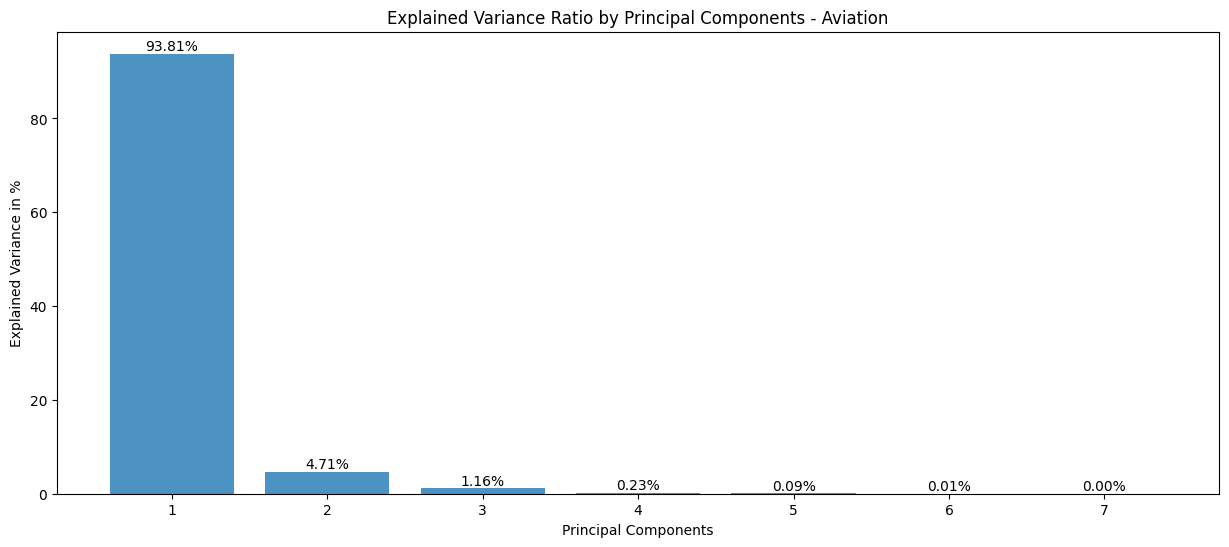

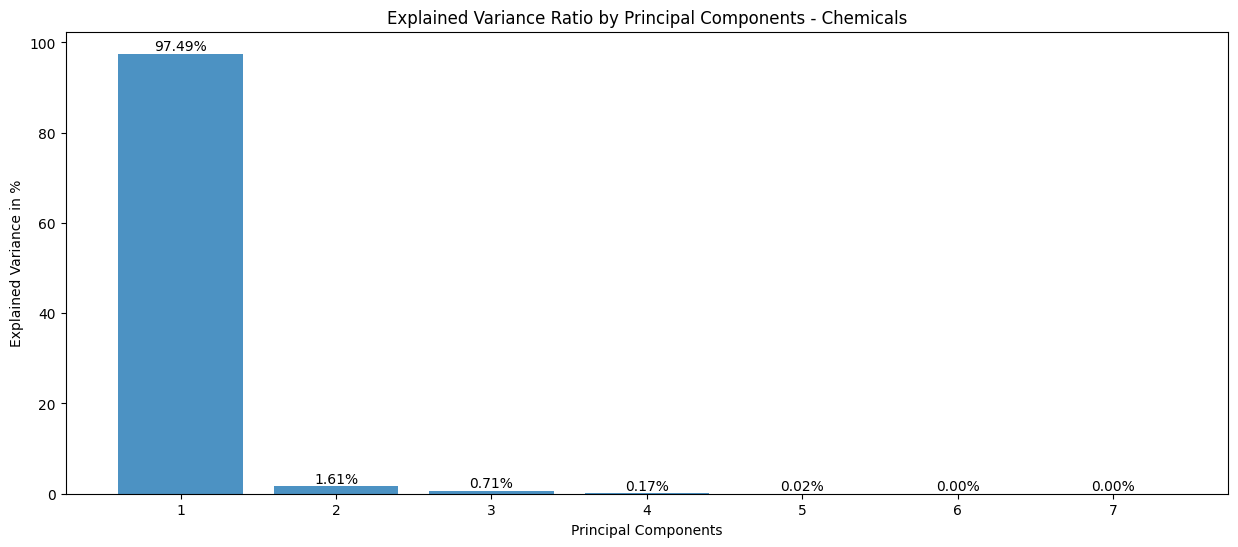

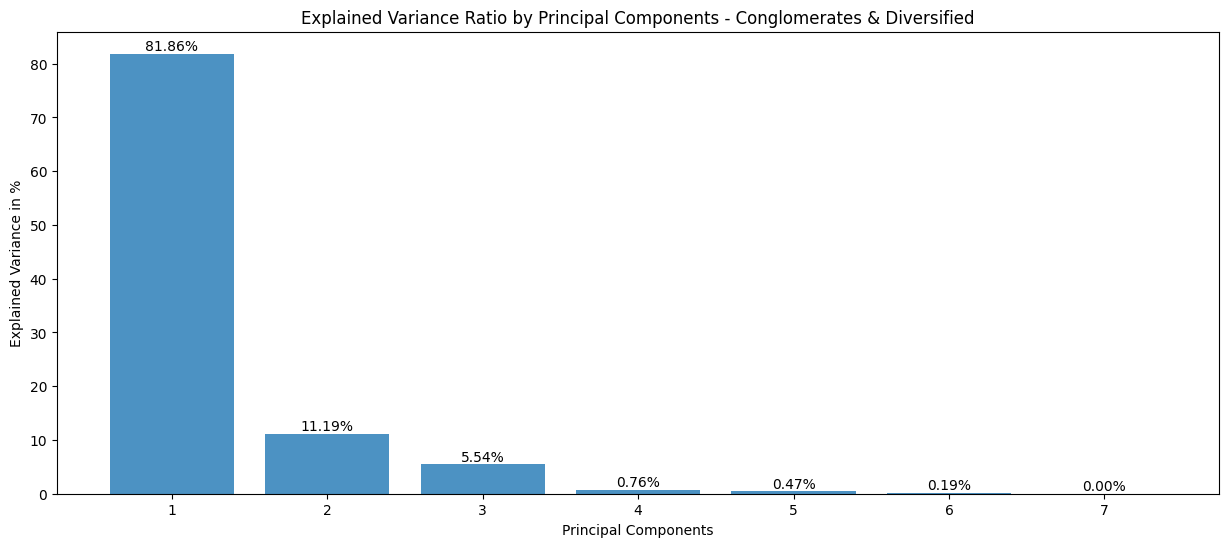

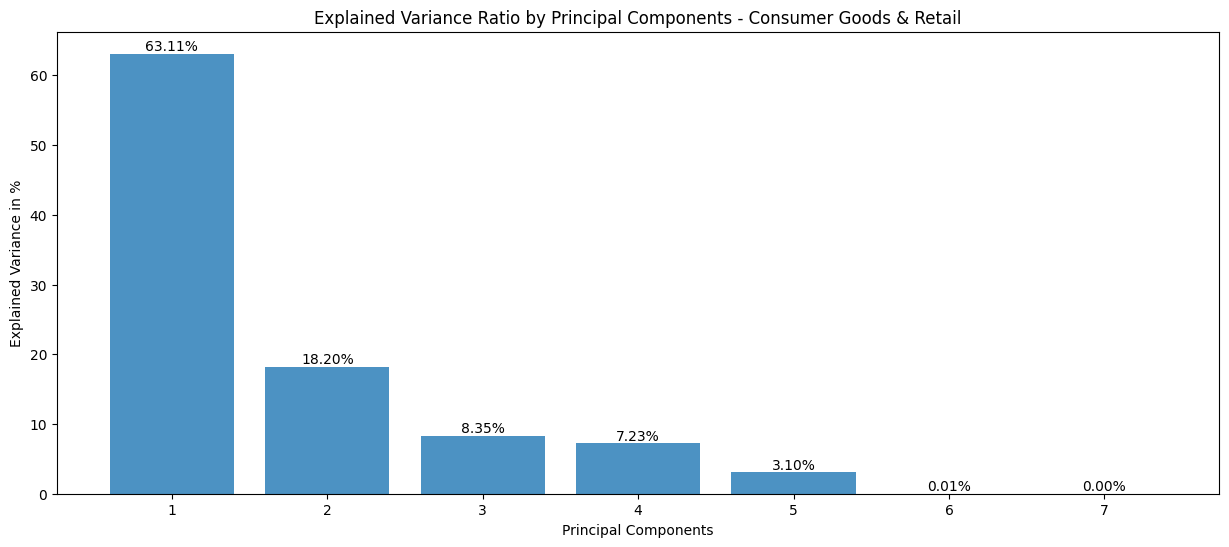

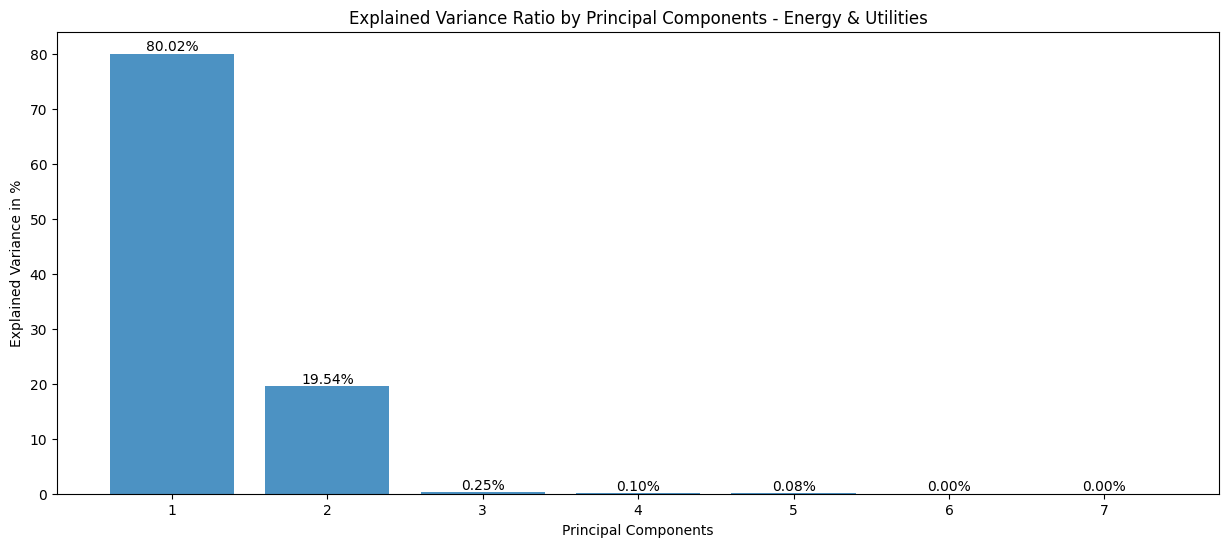

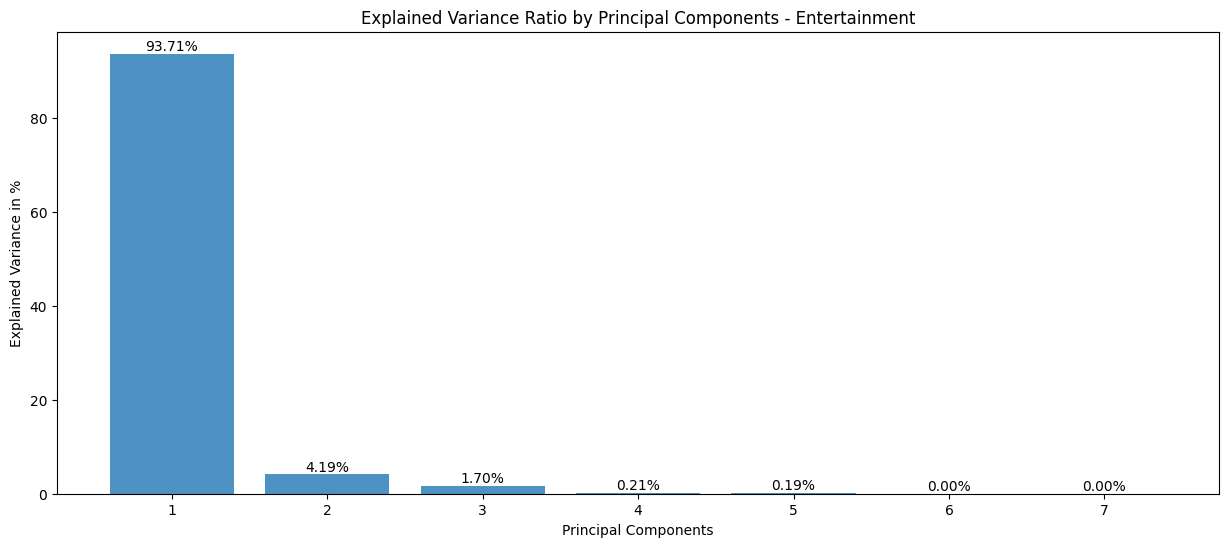

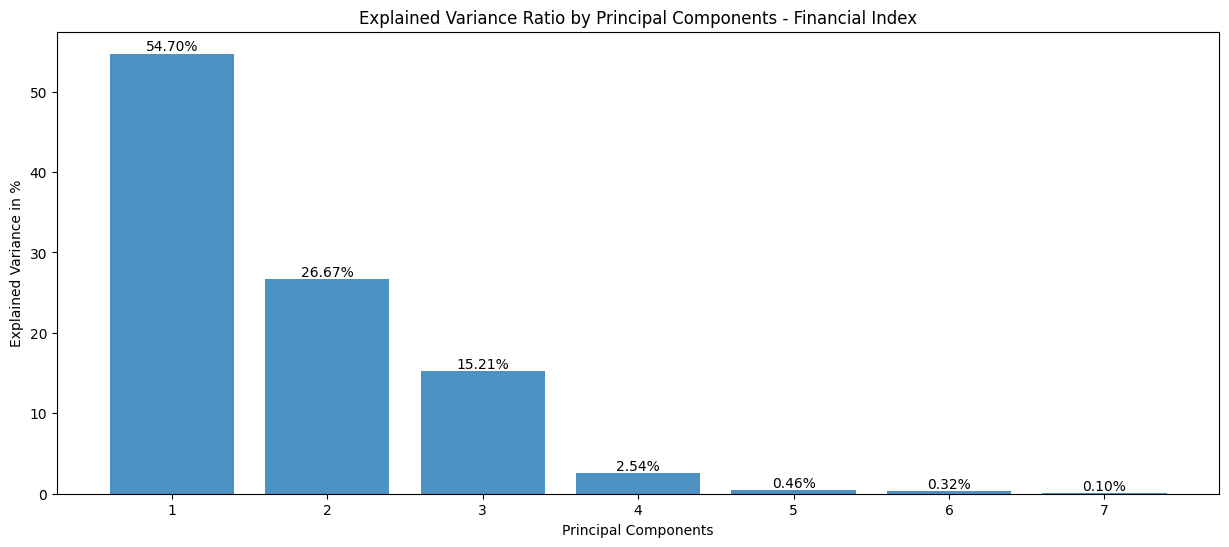

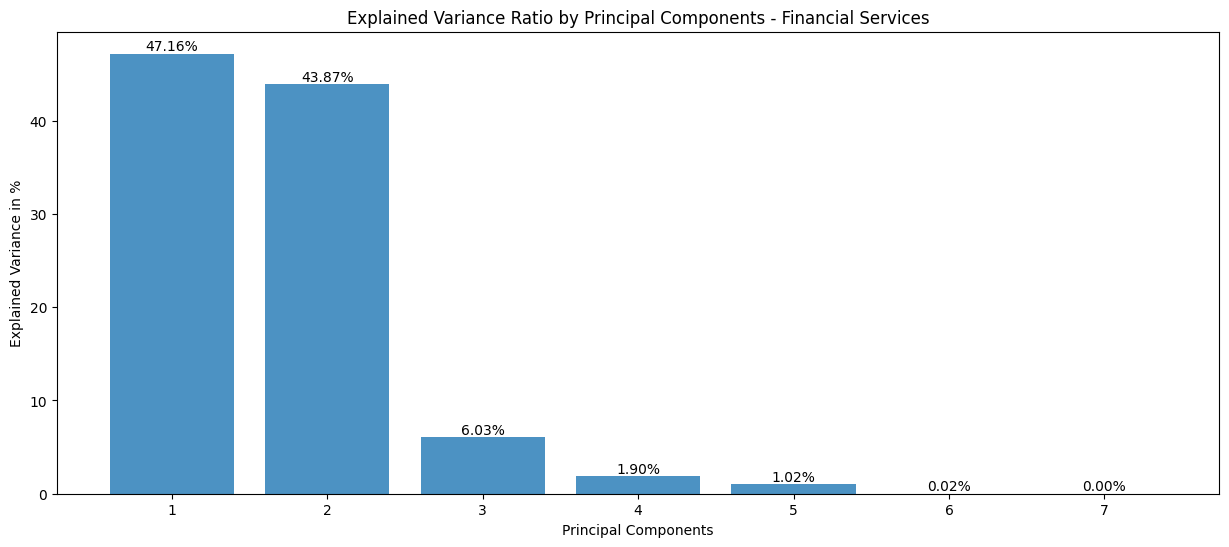

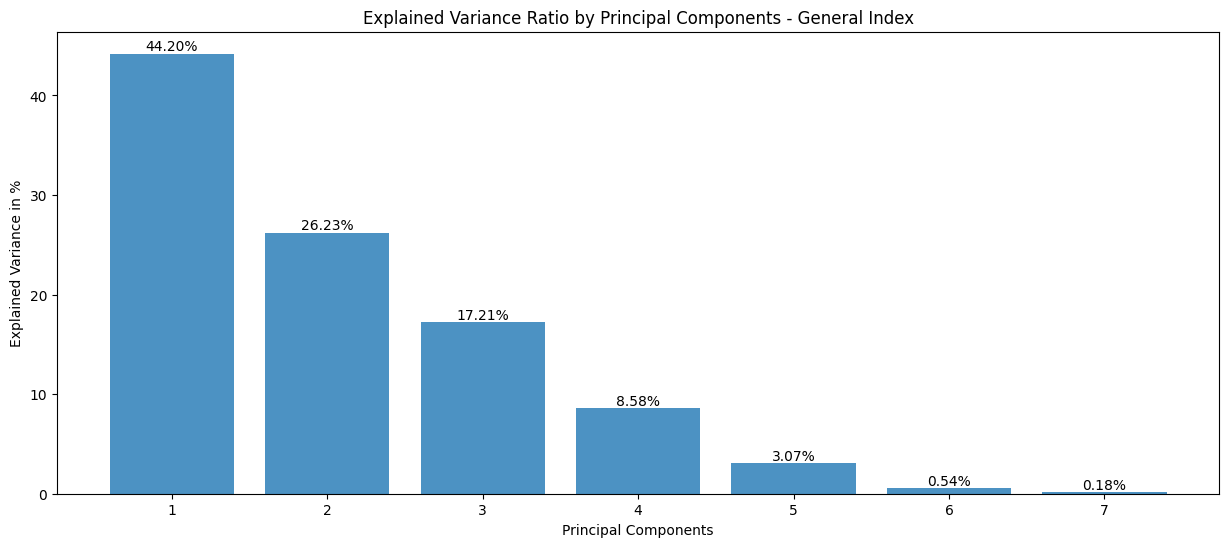

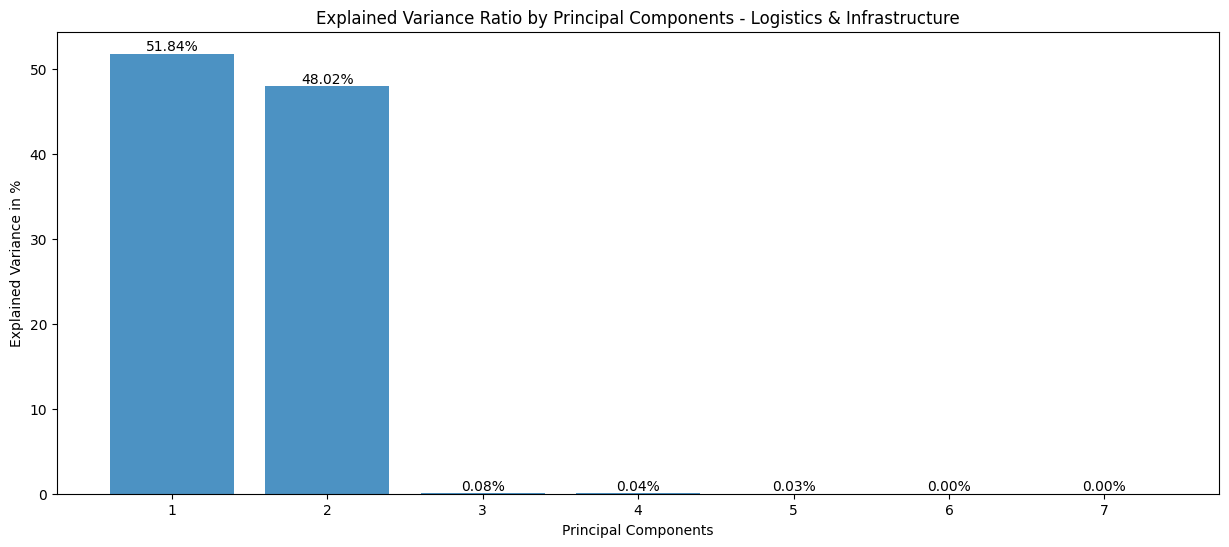

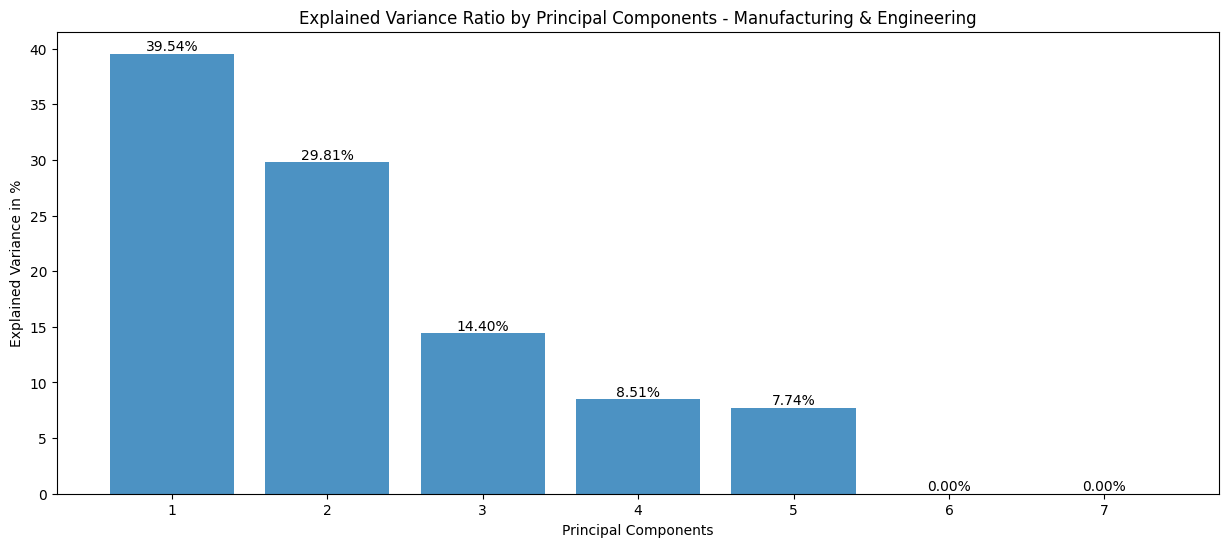

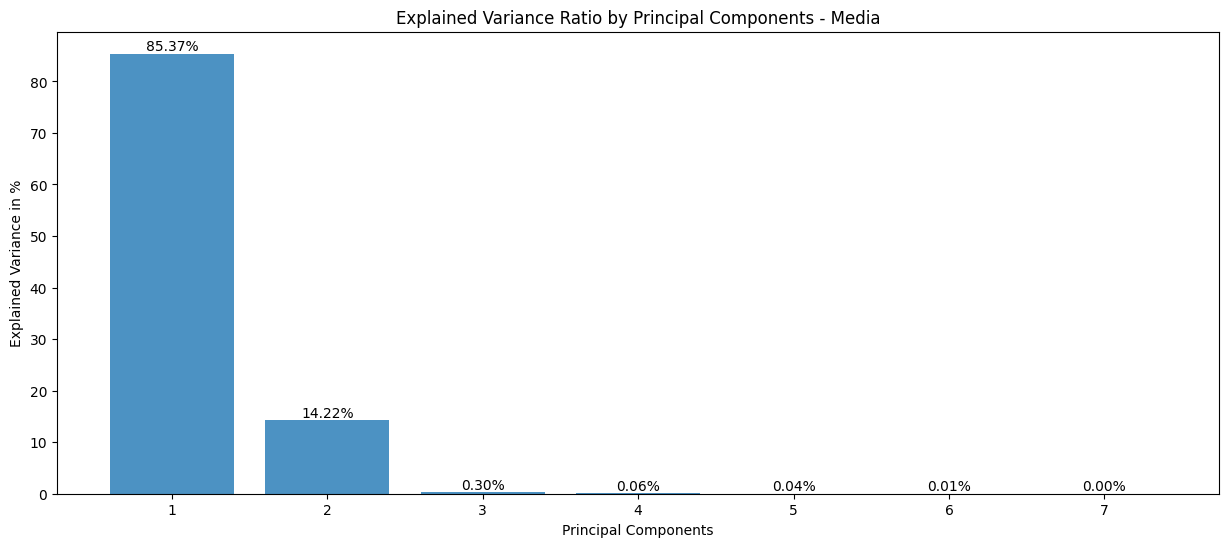

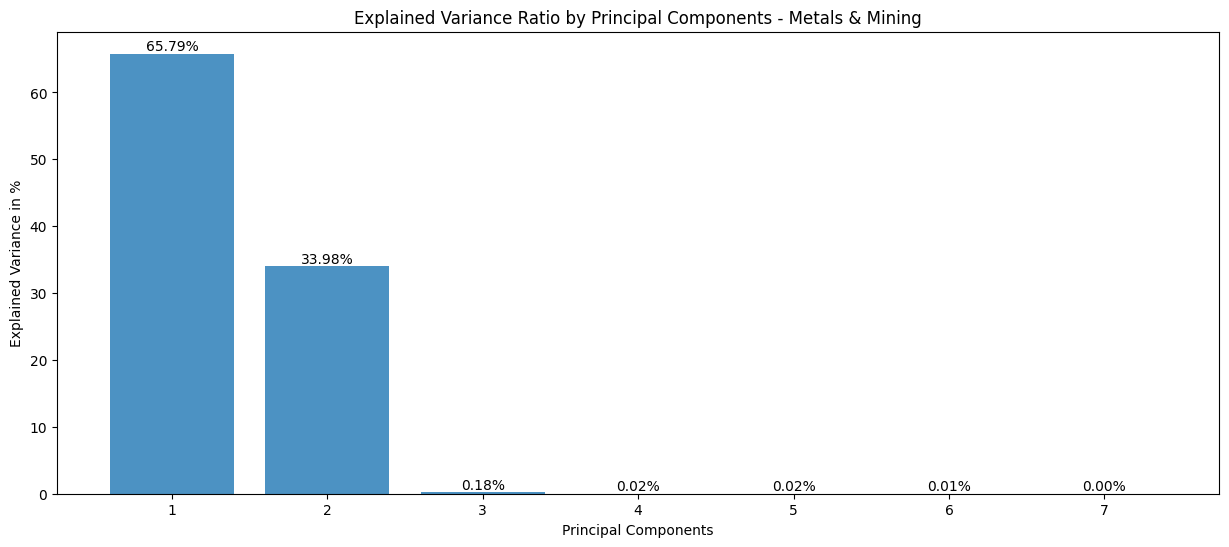

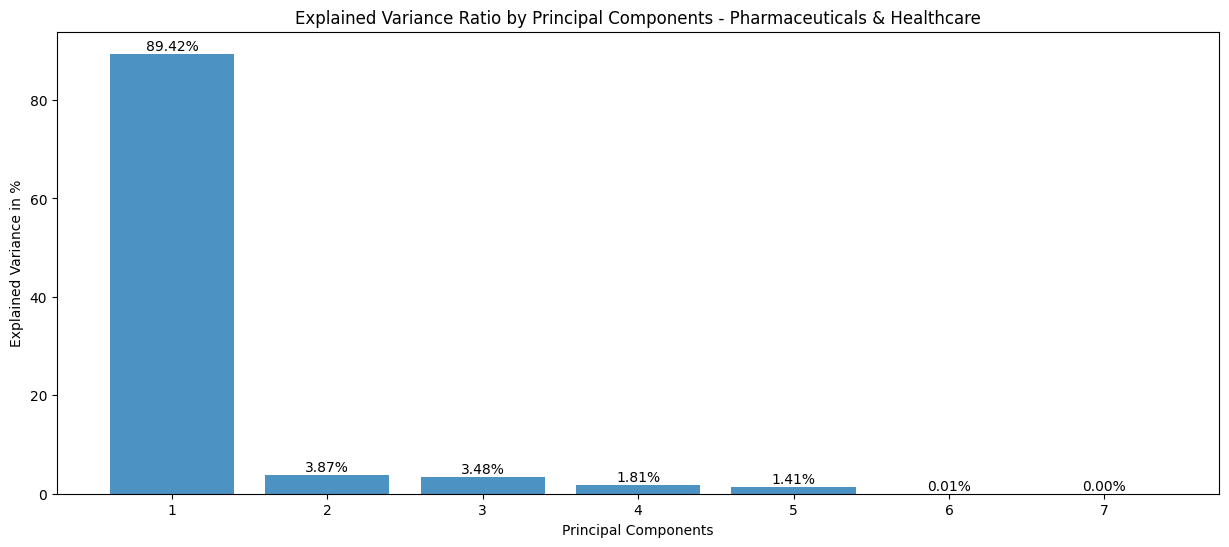

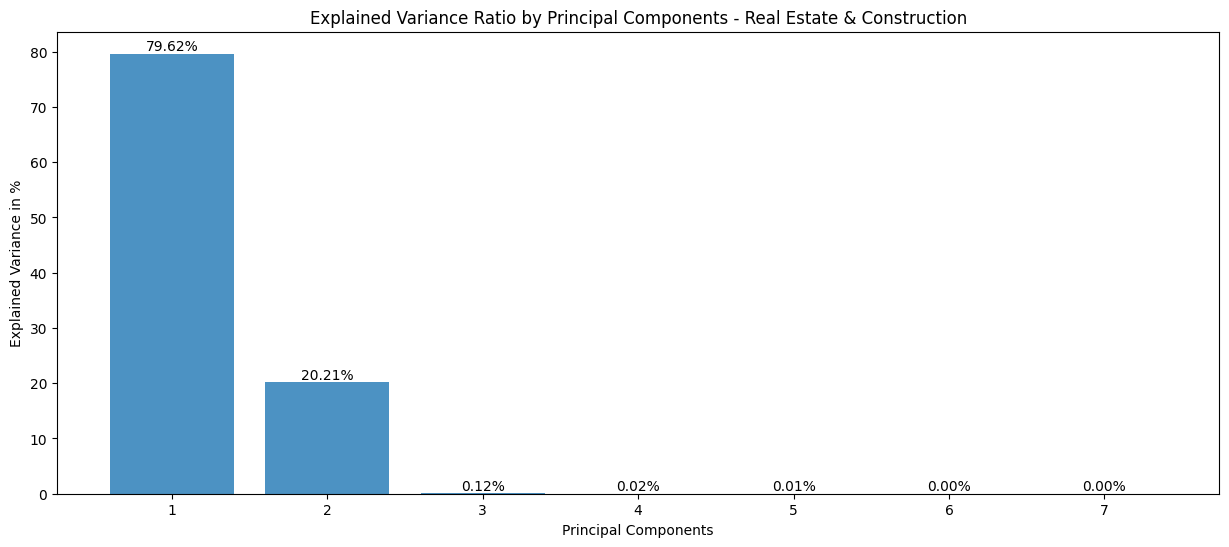

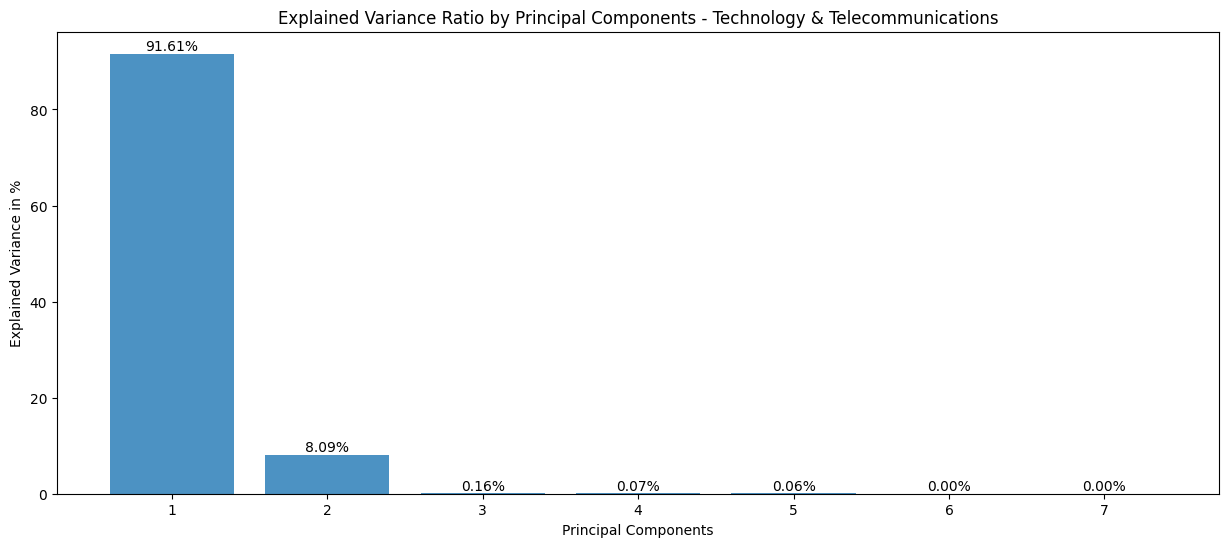

In [16]:

# Iterate over each industry group
for industry, group in grouped:
    # Select columns of interest
    final_df = group[['strike_pr', 'close', 'settle_pr', 'contracts', 'val_inlakh', 'chg_in_oi', 'days_to_expiry']]
    
    # Perform PCA
    pca = PCA(n_components=final_df.shape[1])
    principalComponents = pca.fit_transform(final_df)
    explained_variance = pca.explained_variance_ratio_
    
    # Plot explained variance
    plt.figure(figsize=(15, 6))
    bars = plt.bar(range(1, len(explained_variance) + 1), explained_variance * 100, alpha=0.8, align='center')

    for bar, value in zip(bars, explained_variance):
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{value * 100:.2f}%', ha='center', va='bottom')

    plt.ylabel('Explained Variance in %')
    plt.xlabel('Principal Components')
    plt.title(f'Explained Variance Ratio by Principal Components - {industry}')
    plt.show()


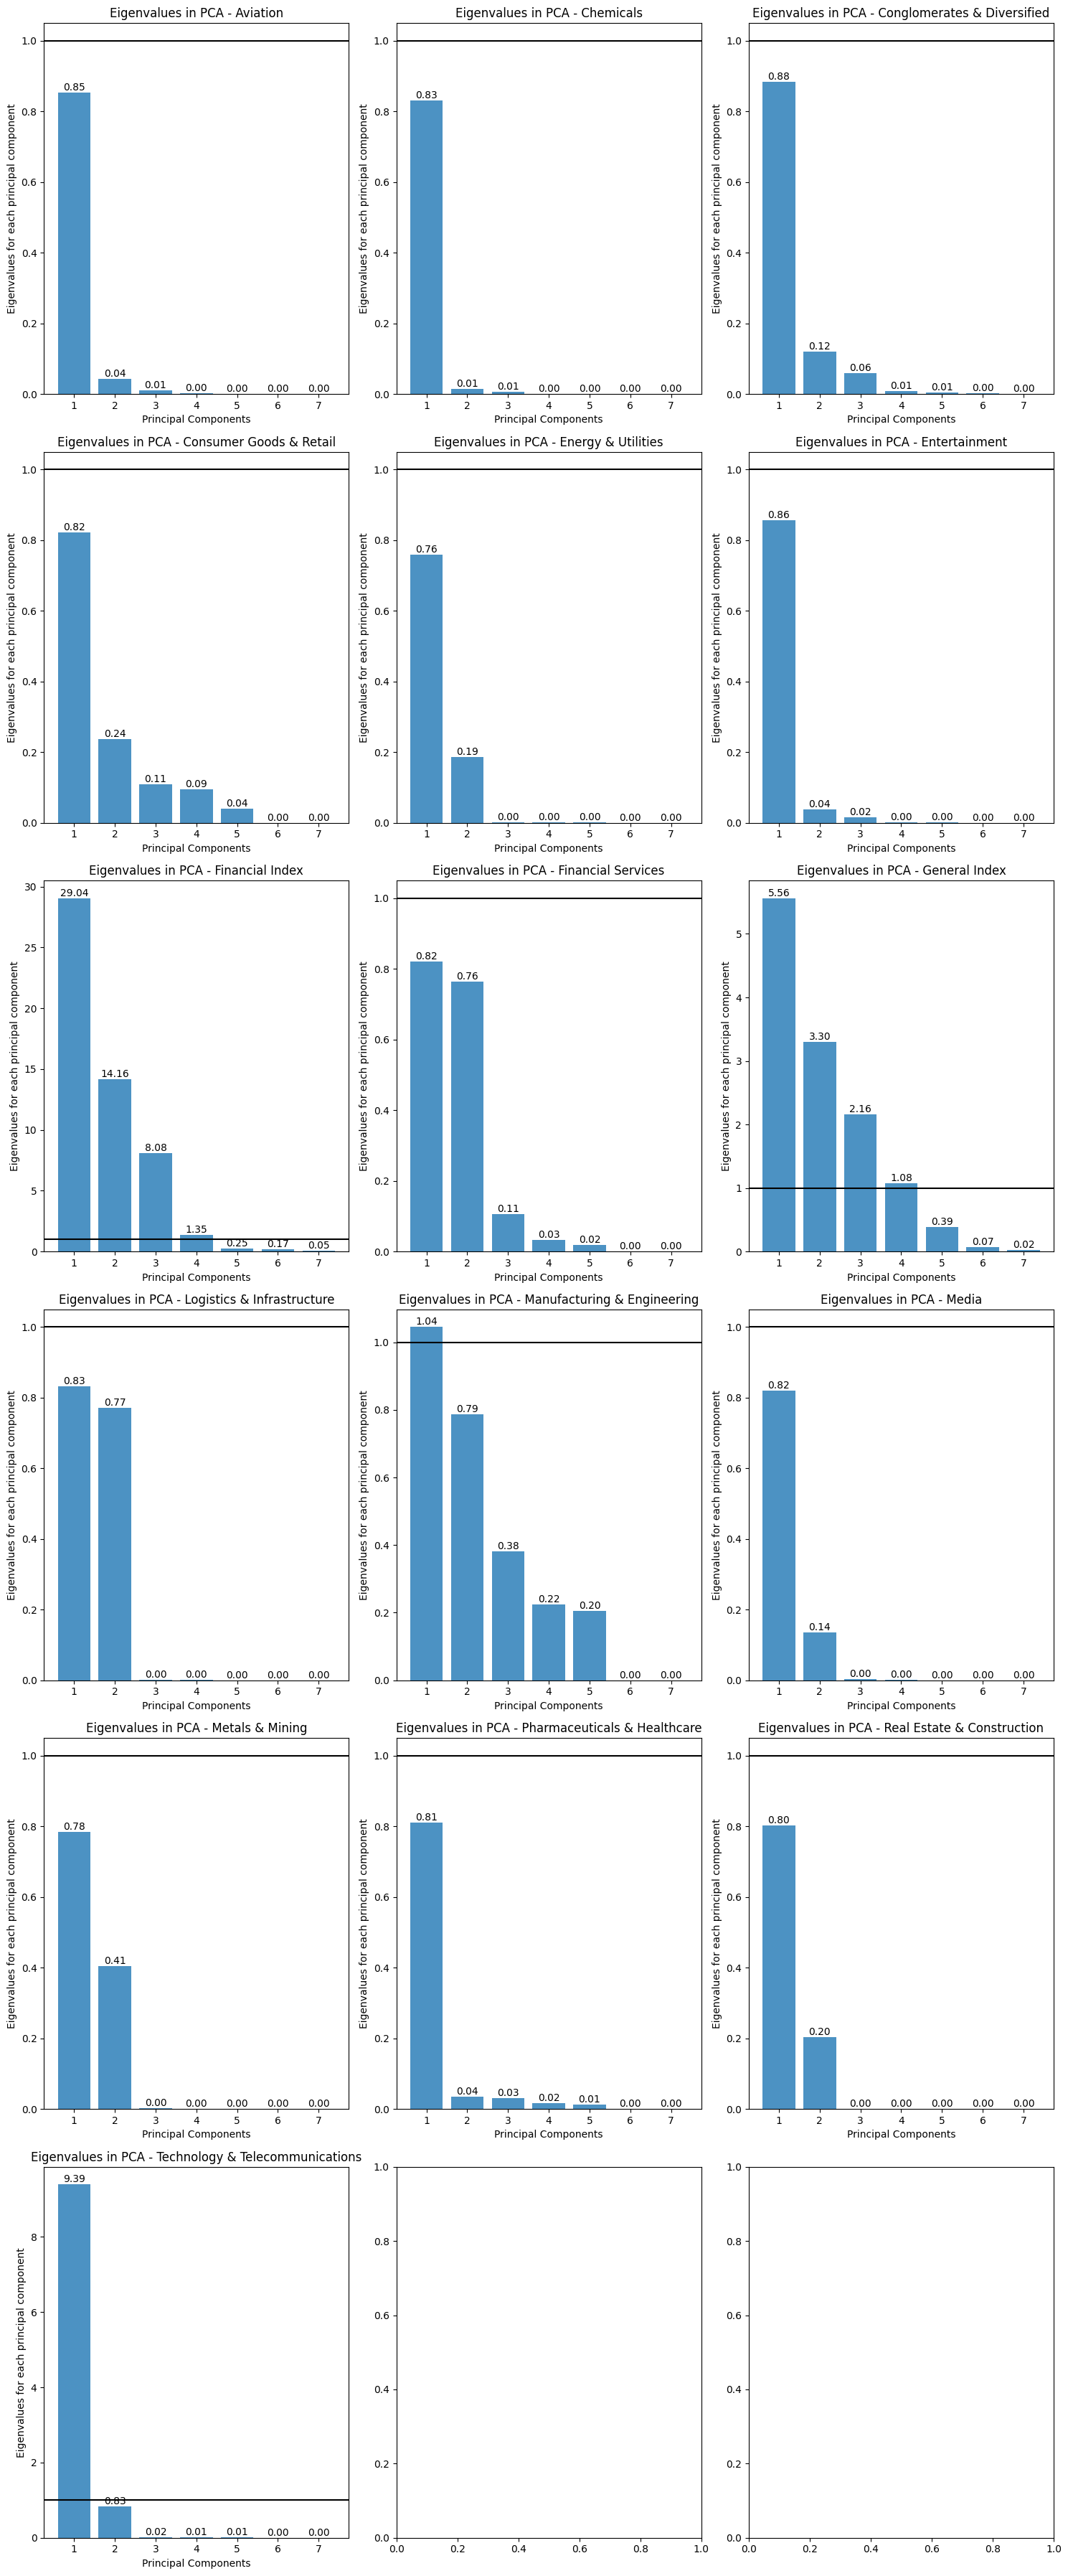

In [17]:
# Calculate the number of rows and columns needed based on the number of industries
num_cols = 3
num_rows = int(np.ceil(len(grouped) / num_cols))

# Create subplots with 3 columns
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, num_rows*6))

# Flatten axes if only one row
if num_rows == 1:
    axes = axes.reshape(1, -1)

# Initialize index counter
index = 0

# Iterate over each industry group
for industry, group in grouped:   
    # Calculate the row and column index for the current subplot
    row_idx = index // num_cols
    col_idx = index % num_cols
    
    # Select columns of interest
    final_df = group[['strike_pr', 'close', 'settle_pr', 'contracts', 'val_inlakh', 'chg_in_oi', 'days_to_expiry']]
    
    # Perform PCA
    pca = PCA(n_components=final_df.shape[1])
    principalComponents = pca.fit_transform(final_df)
    eigenvalues = pca.explained_variance_
    
    # Plot eigenvalues
    bars = axes[row_idx, col_idx].bar(range(1, len(eigenvalues) + 1), eigenvalues, alpha=0.8, align='center')
    axes[row_idx, col_idx].axhline(y=1, color='k', linestyle='-')  # Add a horizontal line at y=1

    for bar, value in zip(bars, eigenvalues):
        axes[row_idx, col_idx].text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{value:.2f}', ha='center', va='bottom')

    axes[row_idx, col_idx].set_ylabel('Eigenvalues for each principal component')
    axes[row_idx, col_idx].set_xlabel('Principal Components')
    axes[row_idx, col_idx].set_title(f'Eigenvalues in PCA - {industry}')
    
    # Increment index counter
    index += 1

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


In [18]:
import numpy as np

# Initialize a list to store the selected industries
selected_industries = []

# Iterate over each industry group
for industry, group in grouped:   
    # Select columns of interest
    final_df = group[['strike_pr', 'close', 'settle_pr', 'contracts', 'val_inlakh', 'chg_in_oi', 'days_to_expiry']]
    
    # Perform PCA
    pca = PCA(n_components=final_df.shape[1])
    principalComponents = pca.fit_transform(final_df)
    eigenvalues = pca.explained_variance_
    
    # Check if any Eigenvalue is greater than or equal to 1
    if any(eigenvalues >= 1):
        selected_industries.append(industry)

# Now selected_industries contains the industries for which the Eigenvalues were >= 1
print("Selected Industries with Eigenvalues >= 1:")
print(selected_industries)


Selected Industries with Eigenvalues >= 1:
['Financial Index', 'General Index', 'Manufacturing & Engineering', 'Technology & Telecommunications']


In [19]:
from sklearn.decomposition import PCA
import pandas as pd

# Define a dictionary to store the results for each industry
industry_pca_results = {}

# Iterate over each industry group
for industry, group in grouped:
    # Check if the industry is in the selected industries
    if industry in selected_industries:
        # Select columns of interest
        final_df = group[['strike_pr', 'close', 'settle_pr', 'contracts', 'val_inlakh', 'chg_in_oi', 'days_to_expiry']]

        # Perform PCA
        pca = PCA(n_components=3)
        principalComponents = pca.fit_transform(final_df)
        loadings = pca.components_

        # Create DataFrames for principal components and loadings
        principalDf = pd.DataFrame(data=principalComponents, columns=['principal component #1', 'principal component #2', 'principal component #3'])
        loadingsDf = pd.DataFrame(data=loadings.T, columns=['PC1_loading', 'PC2_loading', 'PC3_loading'], index=final_df.columns)

        # Store the results in the dictionary
        industry_pca_results[industry] = {'principal_components': principalDf, 'loadings': loadingsDf}

# Print principal component loadings for each industry
for industry, result in industry_pca_results.items():
    print(f"Principal Component Loadings for {industry}:")
    print(result['loadings'])
    print("\n")


Principal Component Loadings for Financial Index:
                PC1_loading  PC2_loading  PC3_loading
strike_pr          0.002015    -0.018046     0.019511
close             -0.064288     0.606415     0.791944
settle_pr          0.178005     0.787537    -0.588814
contracts          0.720133    -0.068180     0.101972
val_inlakh         0.666744    -0.077125     0.123236
chg_in_oi          0.029489    -0.007431     0.007343
days_to_expiry    -0.012955     0.032691     0.010099


Principal Component Loadings for General Index:
                PC1_loading  PC2_loading  PC3_loading
strike_pr          0.004364    -0.038773     0.033274
close             -0.132087     0.549276     0.651800
settle_pr          0.060629     0.253449     0.457361
contracts          0.579313     0.117143    -0.023710
val_inlakh         0.769663     0.146193    -0.027449
chg_in_oi          0.155804     0.019210    -0.032780
days_to_expiry    -0.163087     0.772717    -0.602064


Principal Component Loadings for M

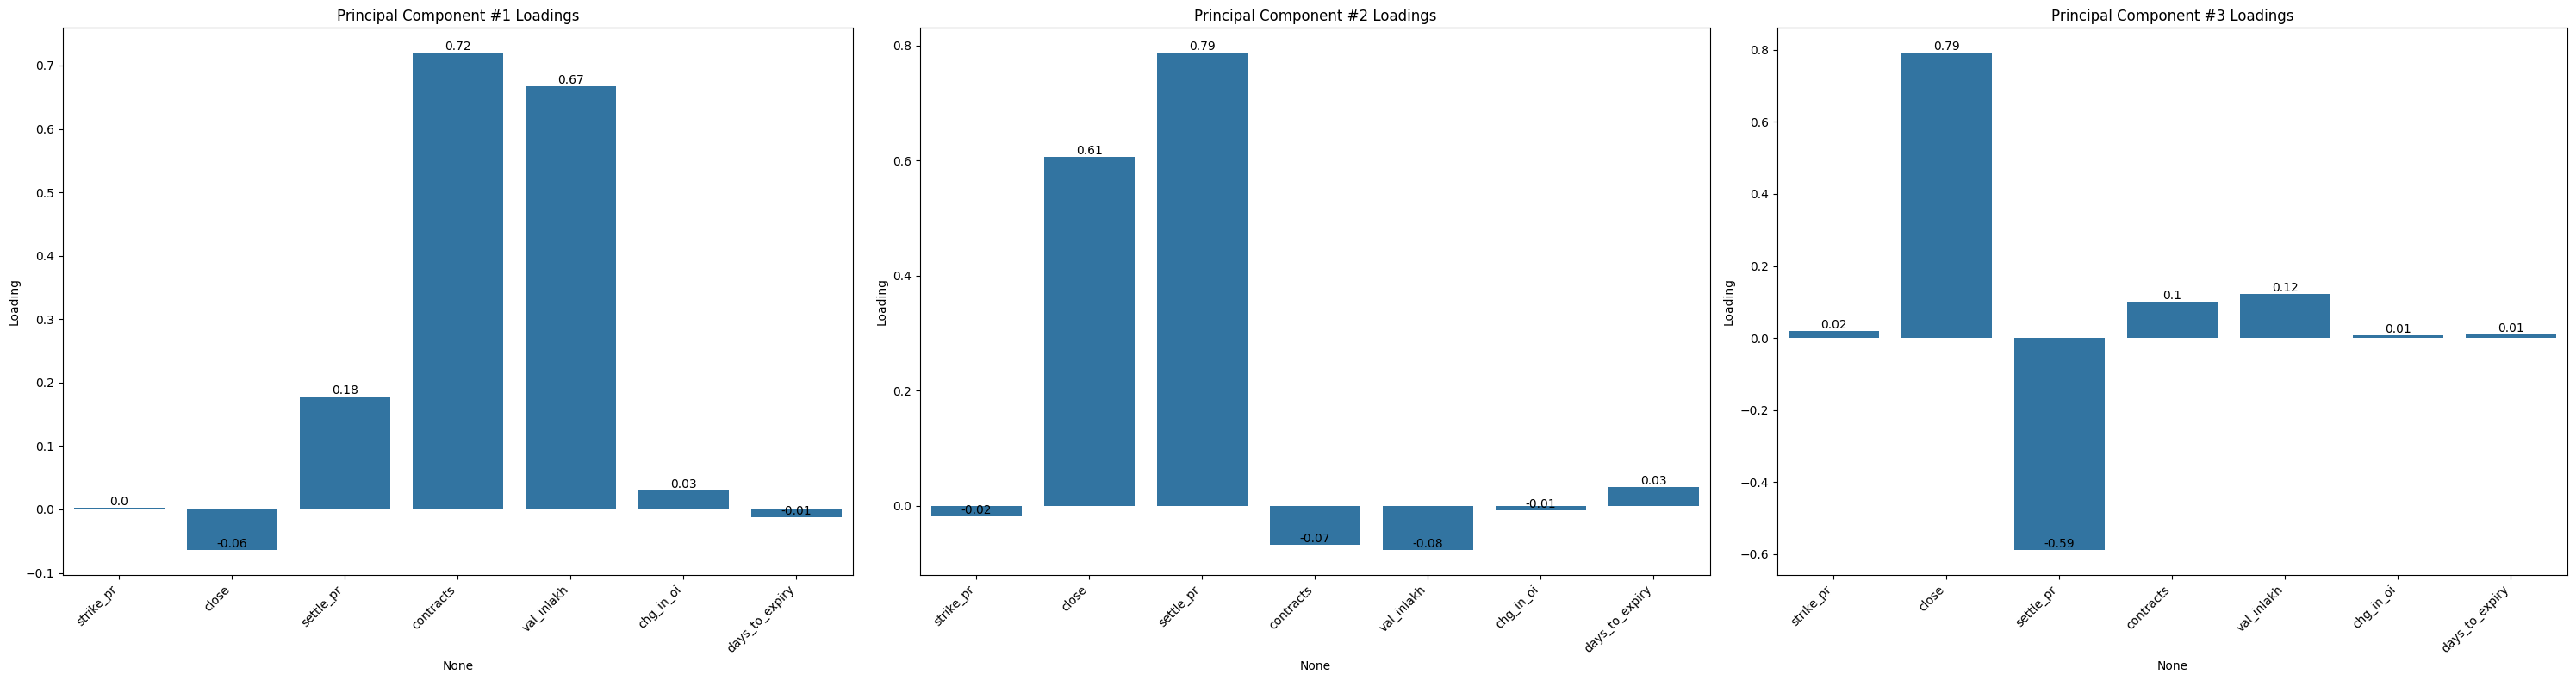

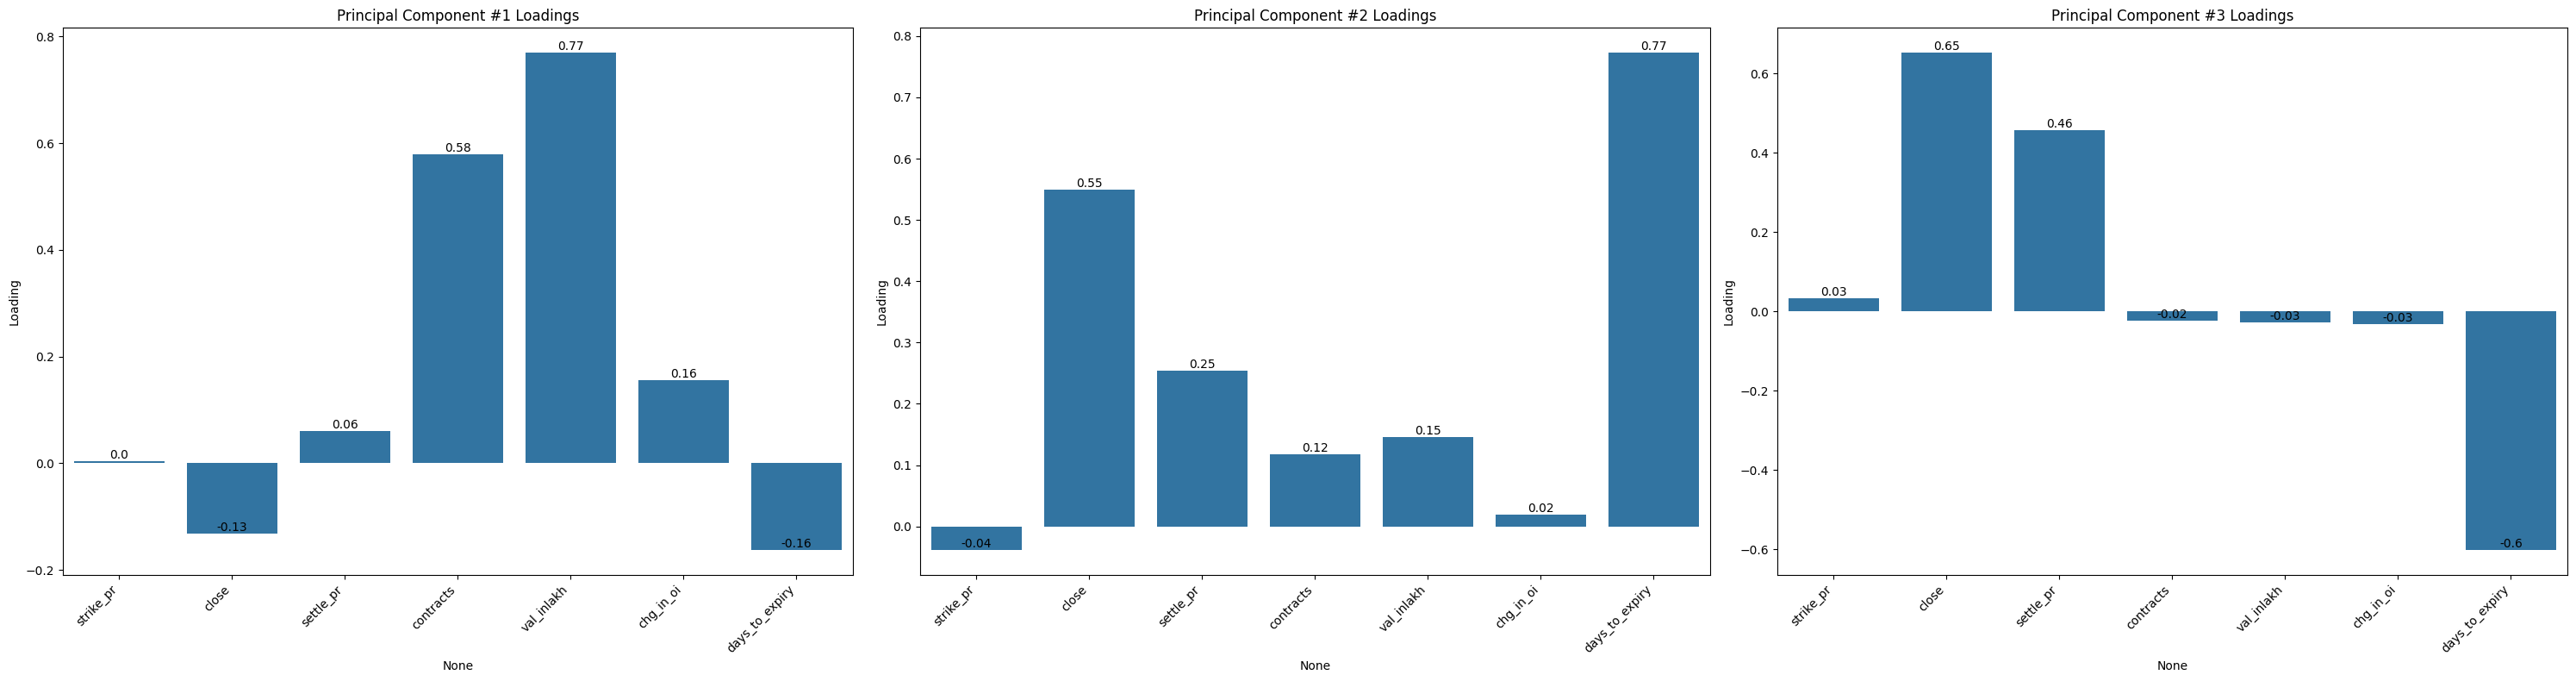

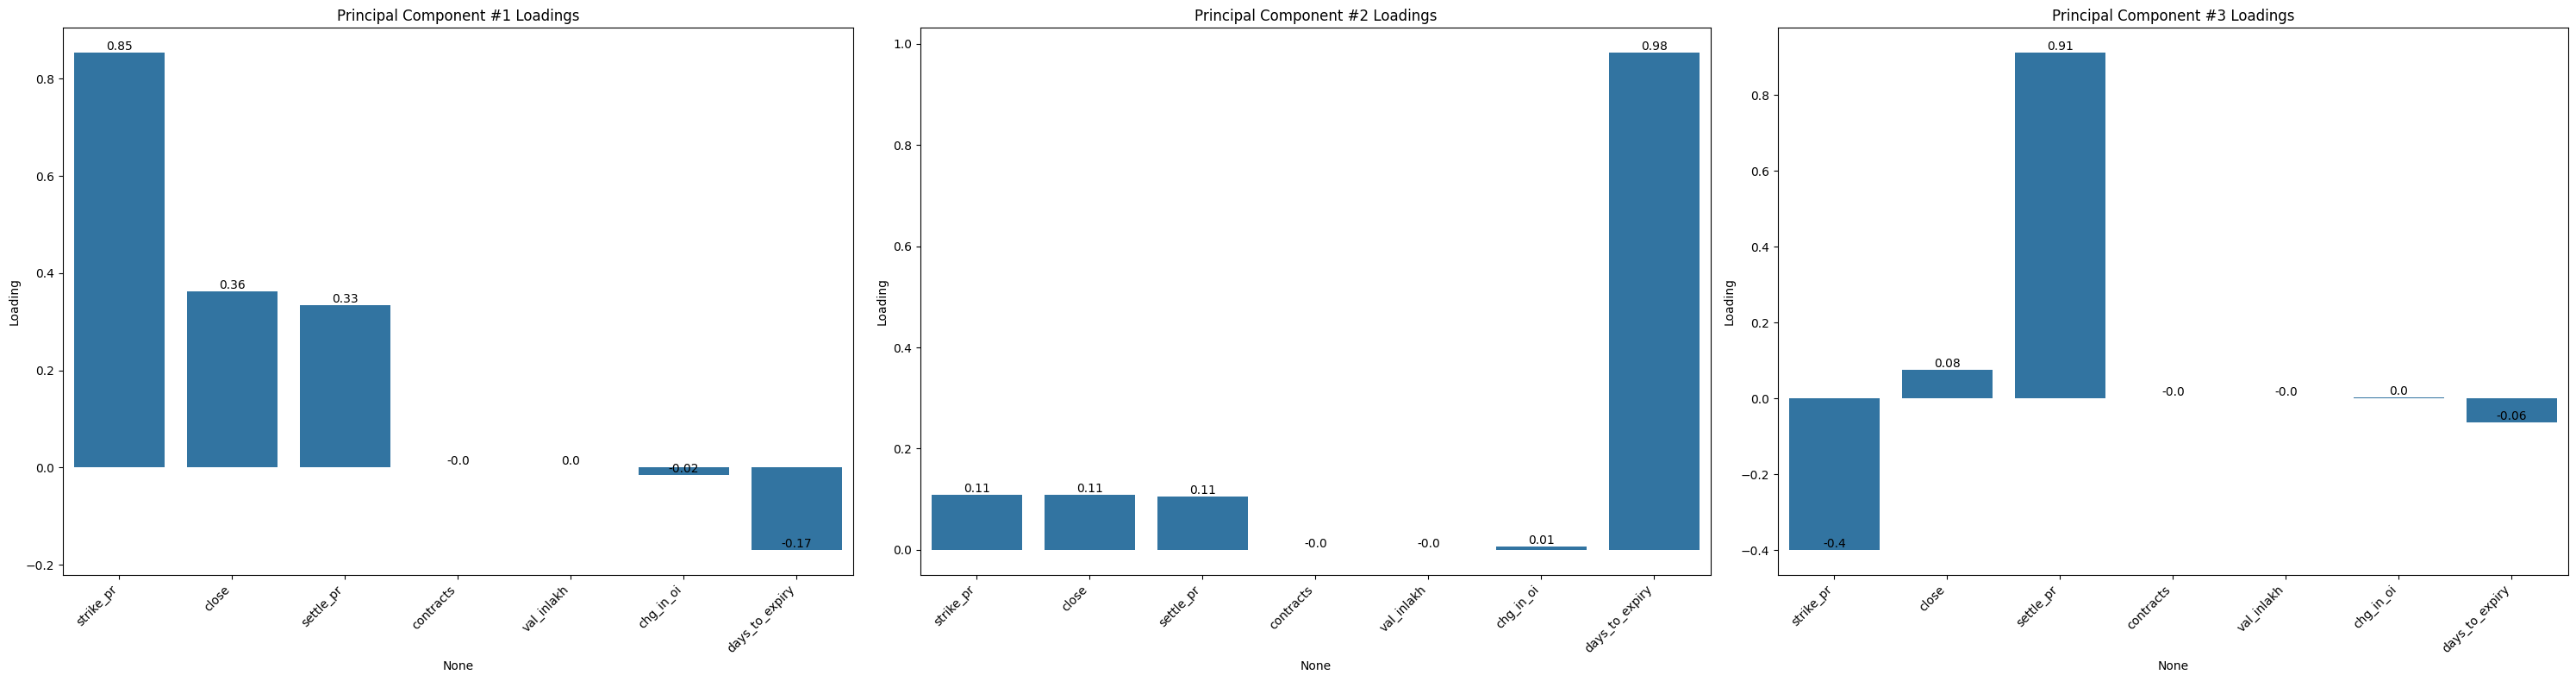

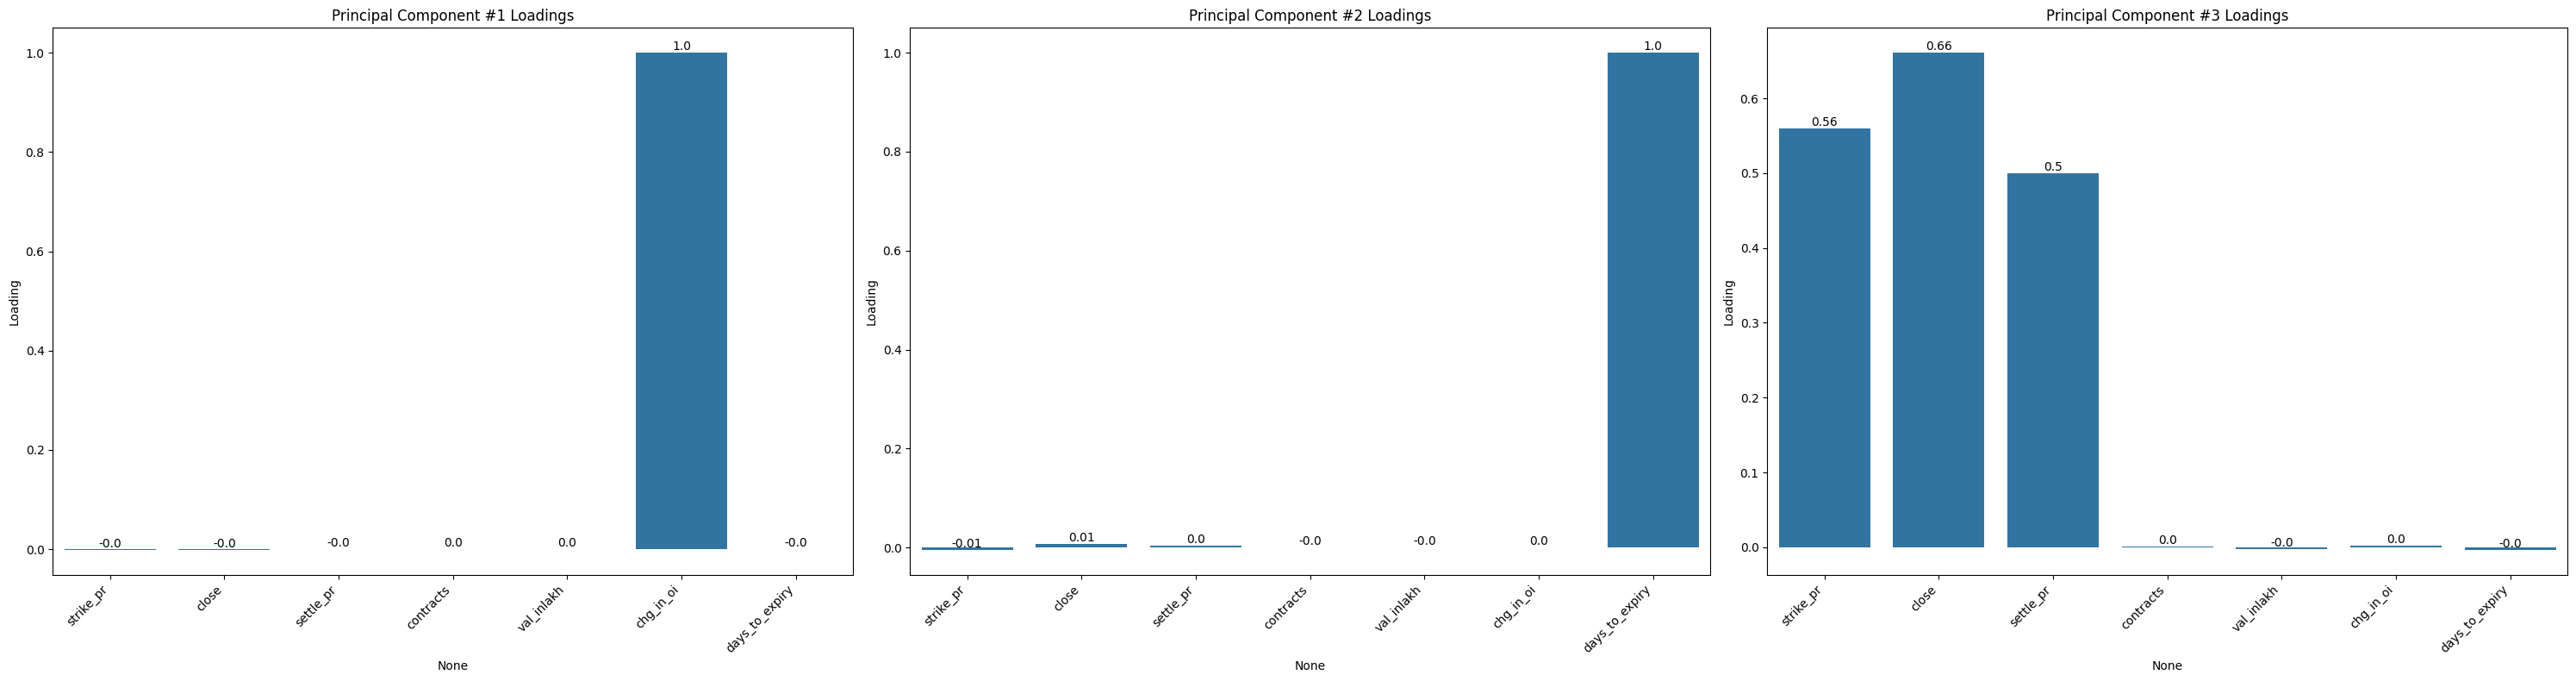

In [20]:
import seaborn as sns

# Iterate over each industry
for industry, result in industry_pca_results.items():
    # Check if the industry is in the selected industries
    if industry in selected_industries:
        loadingsDf = result['loadings']
        fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(30, 8))

        for i in range(3):
            sns.barplot(x=loadingsDf.index, y=f'PC{i+1}_loading', data=loadingsDf, ax=axes[i])
            axes[i].set_title(f'Principal Component #{i+1} Loadings')
            axes[i].set_ylabel('Loading')

            axes[i].set_xticks(range(len(loadingsDf.index)))
            axes[i].set_xticklabels(loadingsDf.index, rotation=45, ha='right')

            for idx, value in enumerate(loadingsDf[f'PC{i+1}_loading']):
                axes[i].text(idx, value, round(value, 2), ha='center', va='bottom')

        plt.tight_layout()
        plt.show()


In [21]:
# Threshold for significance
threshold = 0.45

# Iterate over each industry
for industry, result in industry_pca_results.items():
    # Check if the industry is in the selected industries
    if industry in selected_industries:
        loadingsDf = result['loadings']

        # Sort loadings by absolute value
        sorted_loadings = loadingsDf.abs().sort_values(by=['PC1_loading', 'PC2_loading', 'PC3_loading'], ascending=False)

        # Extract significant variables for each principal component
        significant_variables_pc1 = sorted_loadings[sorted_loadings['PC1_loading'].abs() > threshold][['PC1_loading']].sort_values(by=['PC1_loading'], ascending=False)
        significant_variables_pc2 = sorted_loadings[sorted_loadings['PC2_loading'].abs() > threshold][['PC2_loading']].sort_values(by=['PC2_loading'], ascending=False)
        significant_variables_pc3 = sorted_loadings[sorted_loadings['PC3_loading'].abs() > threshold][['PC3_loading']].sort_values(by=['PC3_loading'], ascending=False)

        print(f"\033[1mSignificant variables for {industry} - PC1:\033[0m")
        print(significant_variables_pc1)
        print("\033[1mSignificant variables for PC2:\033[0m")
        print(significant_variables_pc2)
        print("\033[1mSignificant variables for PC3:\033[0m")
        print(significant_variables_pc3)
        print("\033[1mSignificant variables for PC3:\033[0m")
        print(significant_variables_pc3)
        print()
        print()
        print()

        


Significant variables for Financial Index - PC1:
            PC1_loading
contracts      0.720133
val_inlakh     0.666744
Significant variables for PC2:
           PC2_loading
settle_pr     0.787537
close         0.606415
Significant variables for PC3:
           PC3_loading
close         0.791944
settle_pr     0.588814
Significant variables for PC3:
           PC3_loading
close         0.791944
settle_pr     0.588814



Significant variables for General Index - PC1:
            PC1_loading
val_inlakh     0.769663
contracts      0.579313
Significant variables for PC2:
                PC2_loading
days_to_expiry     0.772717
close              0.549276
Significant variables for PC3:
                PC3_loading
close              0.651800
days_to_expiry     0.602064
settle_pr          0.457361
Significant variables for PC3:
                PC3_loading
close              0.651800
days_to_expiry     0.602064
settle_pr          0.457361



Significant variables for Manufacturing & Engineering

In [22]:
loadingsDf

,PC1_loading,PC2_loading,PC3_loading
strike_pr,-0.002121,-0.005367,0.560184
close,-0.000983,0.007579,0.660960
settle_pr,-0.000586,0.003891,0.499297
contracts,0.000133,-0.000216,0.000435
val_inlakh,0.000140,-0.000341,-0.002795
chg_in_oi,0.999997,0.000632,0.002129
days_to_expiry,-0.000634,0.999949,-0.003948


In [23]:
import numpy as np

# Selecting desired industries
selected_industries = ["Financial Index", "General Index", "Manufacturing & Engineering", "Technology & Telecommunications"]
filtered_est = est1[est1["industry"].isin(selected_industries)]
# Grouping the dataset by symbol and day_exp
grouped_est1 = filtered_est.groupby(["symbol", "days_to_expiry"])

def calculate_return(group):
    group["price_diff"] = group["close"].diff()
    group["return"] = np.log(group["price_diff"].where(group["price_diff"] > 0, np.nan))
    group["return"] /= 100
    group.dropna(subset=["return"], inplace=True)
    return group


# Apply the function to each group
grouped_est1 = grouped_est1.apply(calculate_return)

# Print the resulting DataFrame
grouped_est1


/var/folders/mp/z340trdx7mjffnpsjn7fbgn80000gn/T/ipykernel_44814/3104583779.py:18: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  grouped_est1 = grouped_est1.apply(calculate_return)


industry instrument  \
symbol days_to_expiry                                                      
ACC    -1.186247      862631      Manufacturing & Engineering     OPTSTK   
                      862633      Manufacturing & Engineering     OPTSTK   
                      862635      Manufacturing & Engineering     OPTSTK   
                      862636      Manufacturing & Engineering     OPTSTK   
                      862637      Manufacturing & Engineering     OPTSTK   
...                                                       ...        ...   
WIPRO   1.891131      460231  Technology & Telecommunications     OPTSTK   
                      466362  Technology & Telecommunications     OPTSTK   
                      466363  Technology & Telecommunications     OPTSTK   
                      478390  Technology & Telecommunications     OPTSTK   
                      478394  Technology & Telecommunications     OPTSTK   

                             symbol   expiry_dt  strike_pr option_typ   open  \
symbol days_to_expiry                                                          
ACC    -1.186247      862631    ACC  2020-01-30  -0.259941         PE   0.75   
                      862633    ACC  2020-01-30  -0.254126         PE   0.90   
                      862635    ACC  2020-01-30  -0.248312         PE   0.25   
                      862636    ACC  2020-01-30  -0.245404         PE   0.65   
                      862637    ACC  2020-01-30  -0.242497         PE   3.05   
...                             ...         ...        ...        ...    ...   
WIPRO   1.891131      460231  WIPRO  2020-06-25  -0.436571         PE  18.50   
                      466362  WIPRO  2020-06-25  -0.440205         PE   6.20   
                      466363  WIPRO  2020-06-25  -0.434390         PE  36.00   
                      478390  WIPRO  2020-06-25  -0.438752         CE   6.00   
                      478394  WIPRO  2020-06-25  -0.440205         PE  10.00   

                               high    low     close  settle_pr  contracts  \
symbol days_to_expiry                                                        
ACC    -1.186247      862631   0.75   0.75 -0.241186  -0.161576  -0.066801   
                      862633   0.90   0.05 -0.241654  -0.161576  -0.066675   
                      862635   0.85   0.05 -0.242404  -0.161576  -0.066262   
                      862636   2.45   0.10 -0.241467  -0.161576  -0.065561   
                      862637  18.00   3.05 -0.231437  -0.161576  -0.065651   
...                             ...    ...       ...        ...        ...   
WIPRO   1.891131      460231  18.50  18.50 -0.207909  -0.151053  -0.066801   
                      466362   6.80   6.20 -0.229844  -0.157739  -0.066783   
                      466363  36.00  36.00 -0.175102  -0.141856  -0.066801   
                      478390   6.00   6.00 -0.231343  -0.157823  -0.066801   
                      478394  10.00  10.00 -0.223844  -0.157090  -0.066801   

                              val_inlakh  open_int  chg_in_oi   timestamp  \
symbol days_to_expiry                                                       
ACC    -1.186247      862631   -0.067916     11200  -0.056914  2020-01-30   
                      862633   -0.067795     19200  -0.062532  2020-01-30   
                      862635   -0.067383     27600  -0.071895  2020-01-30   
                      862636   -0.066674     22800  -0.090622  2020-01-30   
                      862637   -0.066743      7200  -0.114967  2020-01-30   
...                                  ...       ...        ...         ...   
WIPRO   1.891131      460231   -0.067912      3200  -0.041932  2020-05-21   
                      466362   -0.067898      9600  -0.026951  2020-05-20   
                      466363   -0.067909      3200  -0.041932  2020-05-20   
                      478390   -0.067915      3200  -0.041932  2020-05-18   
                      478394   -0.067915      3200  -0.041932  2020-05-18   

      

In [24]:
filtered_test = test1[test1["industry"].isin(selected_industries)]

# Grouping the dataset by symbol and day_exp
grouped_test1 = filtered_est.groupby(["symbol", "days_to_expiry"])

# Selecting desired industries
selected_industries = ["Financial Index", "General Index", "Manufacturing & Engineering", "Technology & Telecommunications"]
filtered_test = test1[test1["industry"].isin(selected_industries)]

# Grouping the dataset by symbol and day_exp
grouped_test1 = filtered_test.groupby(["symbol", "days_to_expiry"])

def calculate_return(group):
    group["price_diff"] = group["close"].diff()
    group["return"] = np.log(group["price_diff"].where(group["price_diff"] > 0, np.nan))
    group["return"] /= 100
    group.dropna(subset=["return"], inplace=True)
    return group

# Apply the function to each group
grouped_test1 = grouped_test1.apply(calculate_return)

# Print the resulting DataFrame
grouped_test1

/var/folders/mp/z340trdx7mjffnpsjn7fbgn80000gn/T/ipykernel_44814/1526990479.py:21: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  grouped_test1 = grouped_test1.apply(calculate_return)


industry instrument  \
symbol days_to_expiry                                                      
ACC    147            425360      Manufacturing & Engineering     OPTSTK   
                      425367      Manufacturing & Engineering     OPTSTK   
                      425372      Manufacturing & Engineering     OPTSTK   
                      425375      Manufacturing & Engineering     OPTSTK   
                      425378      Manufacturing & Engineering     OPTSTK   
...                                                       ...        ...   
WIPRO  266            132989  Technology & Telecommunications     OPTSTK   
                      142848  Technology & Telecommunications     OPTSTK   
       301            5297    Technology & Telecommunications     OPTSTK   
                      5298    Technology & Telecommunications     OPTSTK   
                      5299    Technology & Telecommunications     OPTSTK   

                             symbol   expiry_dt  strike_pr option_typ   open  \
symbol days_to_expiry                                                          
ACC    147            425360    ACC  2020-05-28     1320.0         CE   1.45   
                      425367    ACC  2020-05-28     1060.0         PE   0.20   
                      425372    ACC  2020-05-28     1160.0         PE   0.05   
                      425375    ACC  2020-05-28     1220.0         PE   1.45   
                      425378    ACC  2020-05-28     1300.0         PE  31.95   
...                             ...         ...        ...        ...    ...   
WIPRO  266            132989  WIPRO  2020-09-24      295.0         CE  12.50   
                      142848  WIPRO  2020-09-24      307.5         PE  33.10   
       301            5297    WIPRO  2020-10-29      280.0         PE  14.75   
                      5298    WIPRO  2020-10-29      287.5         PE  18.90   
                      5299    WIPRO  2020-10-29      315.0         PE  38.25   

                               high    low  close  settle_pr  contracts  \
symbol days_to_expiry                                                     
ACC    147            425360   1.45   0.05   0.10    1272.20         57   
                      425367   0.20   0.10   0.10    1272.20          2   
                      425372   0.20   0.05   0.20    1272.20          6   
                      425375   1.45   0.05   0.10    1272.20         38   
                      425378  41.10  31.95  33.10    1272.20         10   
...                             ...    ...    ...        ...        ...   
WIPRO  266            132989  12.50  12.50  12.50      10.30          1   
                      142848  33.10  33.10  33.10      29.15          2   
       301            5297    14.75  14.75  14.75      18.50          4   
                      5298    20.85  18.90  20.85      23.20          4   
                      5299    38.25  38.25  38.25      44.50          2   

                              val_inlakh  open_int  chg_in_oi   timestamp  \
symbol days_to_expiry                                                       
ACC    147            425360      301.08     12800      -5200  2020-05-28   
                      425367        8.48      6400          0  2020-05-28   
                      425372       27.84     20000       -800  2020-05-28   
                      425375      185.50      8400      -1200  2020-05-28   
                      425378       53.57      4000       1200  2020-05-28   
...                                  ...       ...        ...         ...   
WIPRO  266            132989        9.84      3200       3200  2020-07-31   
                      142848       21.79      6400       6400  2020-07-30   
       301            5297         37.72     12800      12800  2020-08-31   
                      5298         39.34     12800      12800  2020-08-31   
                      5299         22.60      6400       6400  2020-08-31   

                              days_to_expiry 

In [25]:
grouped_est1['PC1FI'] = np.where(grouped_est1['industry'] == 'Financial Index', 0.720133, 0)
grouped_est1['PC2FI'] = np.where(grouped_est1['industry'] == 'Financial Index', 0.787537, 0)
grouped_est1['PC3FI'] = np.where(grouped_est1['industry'] == 'Financial Index', 0.791944, 0)

grouped_est1['PC1GI'] = np.where(grouped_est1['industry'] == 'General Index', 0.769663, 0)
grouped_est1['PC2GI'] = np.where(grouped_est1['industry'] == 'General Index', 0.772717, 0)
grouped_est1['PC3GI'] = np.where(grouped_est1['industry'] == 'General Index', 0.651800, 0)
grouped_est1['PC4GI'] = np.where(grouped_est1['industry'] == 'General Index', 0.651800, 0)

grouped_est1['PCME'] = np.where(grouped_est1['industry'] == 'Manufacturing & Engineering', 0.853321, 0)
grouped_est1['PCTT'] = np.where(grouped_est1['industry'] == 'Technology & Telecommunications', 0.999997, 0)


grouped_est1

industry instrument  \
symbol days_to_expiry                                                      
ACC    -1.186247      862631      Manufacturing & Engineering     OPTSTK   
                      862633      Manufacturing & Engineering     OPTSTK   
                      862635      Manufacturing & Engineering     OPTSTK   
                      862636      Manufacturing & Engineering     OPTSTK   
                      862637      Manufacturing & Engineering     OPTSTK   
...                                                       ...        ...   
WIPRO   1.891131      460231  Technology & Telecommunications     OPTSTK   
                      466362  Technology & Telecommunications     OPTSTK   
                      466363  Technology & Telecommunications     OPTSTK   
                      478390  Technology & Telecommunications     OPTSTK   
                      478394  Technology & Telecommunications     OPTSTK   

                             symbol   expiry_dt  strike_pr option_typ   open  \
symbol days_to_expiry                                                          
ACC    -1.186247      862631    ACC  2020-01-30  -0.259941         PE   0.75   
                      862633    ACC  2020-01-30  -0.254126         PE   0.90   
                      862635    ACC  2020-01-30  -0.248312         PE   0.25   
                      862636    ACC  2020-01-30  -0.245404         PE   0.65   
                      862637    ACC  2020-01-30  -0.242497         PE   3.05   
...                             ...         ...        ...        ...    ...   
WIPRO   1.891131      460231  WIPRO  2020-06-25  -0.436571         PE  18.50   
                      466362  WIPRO  2020-06-25  -0.440205         PE   6.20   
                      466363  WIPRO  2020-06-25  -0.434390         PE  36.00   
                      478390  WIPRO  2020-06-25  -0.438752         CE   6.00   
                      478394  WIPRO  2020-06-25  -0.440205         PE  10.00   

                               high    low     close  ...    return  PC1FI  \
symbol days_to_expiry                                 ...                    
ACC    -1.186247      862631   0.75   0.75 -0.241186  ... -0.066360    0.0   
                      862633   0.90   0.05 -0.241654  ... -0.070778    0.0   
                      862635   0.85   0.05 -0.242404  ... -0.092750    0.0   
                      862636   2.45   0.10 -0.241467  ... -0.069724    0.0   
                      862637  18.00   3.05 -0.231437  ... -0.046022    0.0   
...                             ...    ...       ...  ...       ...    ...   
WIPRO   1.891131      460231  18.50  18.50 -0.207909  ... -0.036051    0.0   
                      466362   6.80   6.20 -0.229844  ... -0.052497    0.0   
                      466363  36.00  36.00 -0.175102  ... -0.029051    0.0   
                      478390   6.00   6.00 -0.231343  ... -0.056915    0.0   
                      478394  10.00  10.00 -0.223844  ... -0.041999    0.0   

                              PC2FI  PC3FI  PC1GI PC2GI  PC3GI  PC4GI  \
symbol days_to_expiry                                                   
ACC    -1.186247      862631    0.0    0.0    0.0   0.0    0.0    0.0   
                      862633    0.0    0.0    0.0   0.0    0.0    0.0   
                      862635    0.0    0.0    0.0   0.0    0.0    0.0   
                      862636    0.0    0.0    0.0   0.0    0.0    0.0   
                      862637    0.0    0.0    0.0   0.0    0.0    0.0   
...                             ...    ...    ...   ...    ...    ...   
WIPRO   1.891131      460231    0.0    0.0    0.0   0.0    0.0    0.0   
                      466362    0.0    0.0    0.0   0.0    0.0    0.0   
                      466363    0.0    0.0    0.0   0.0    0.0    0.0   
                      478390    0.0    0.0    0.0   0.0    0.0    0.0   
                      478394    0.0    0.0    0.0   0.0    0.0    0.0   

                                  PCME      PCTT  
symbol 

In [26]:

X = grouped_est1[['PC1FI', 'PC2FI', 'PC3FI', 'PC1GI', 'PC2GI', 'PC3GI', 'PC4GI', 'PCME']]
X = sm.add_constant(X) 

# Select the dependent variable
y = grouped_est1['return']

# Create the OLS model
model = sm.OLS(y, X)
results = model.fit(cov_type ="HC1")

# Print out the statistics
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:                 return   R-squared:                       0.113
Model:                            OLS   Adj. R-squared:                  0.113
Method:                 Least Squares   F-statistic:                     1.273
Date:                Tue, 14 May 2024   Prob (F-statistic):              0.282
Time:                        07:26:48   Log-Likelihood:             2.4524e+05
No. Observations:              101420   AIC:                        -4.905e+05
Df Residuals:                  101415   BIC:                        -4.904e+05
Df Model:                           4                                         
Covariance Type:                  HC1                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0524      0.000   -292.742      0.0

/Users/macbook/Library/Caches/pypoetry/virtualenvs/econometrics-OGw9NUcD-py3.12/lib/python3.12/site-packages/statsmodels/base/model.py:1896: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 8, but rank is 3
  warnings.warn('covariance of constraints does not have full '


In [27]:
grouped_test1['PC1FI'] = np.where(grouped_test1['industry'] == 'Financial Index', 0.720133, 0)
grouped_test1['PC2FI'] = np.where(grouped_test1['industry'] == 'Financial Index', 0.787537, 0)
grouped_test1['PC3FI'] = np.where(grouped_test1['industry'] == 'Financial Index', 0.791944, 0)

grouped_test1['PC1GI'] = np.where(grouped_test1['industry'] == 'General Index', 0.769663, 0)
grouped_test1['PC2GI'] = np.where(grouped_test1['industry'] == 'General Index', 0.772717, 0)
grouped_test1['PC3GI'] = np.where(grouped_test1['industry'] == 'General Index', 0.651800, 0)
grouped_test1['PC4GI'] = np.where(grouped_test1['industry'] == 'General Index', 0.651800, 0)

grouped_test1['PCME'] = np.where(grouped_test1['industry'] == 'Manufacturing & Engineering', 0.853321, 0)
grouped_test1['PCTT'] = np.where(grouped_test1['industry'] == 'Technology & Telecommunications', 0.999997, 0)


grouped_test1

industry instrument  \
symbol days_to_expiry                                                      
ACC    147            425360      Manufacturing & Engineering     OPTSTK   
                      425367      Manufacturing & Engineering     OPTSTK   
                      425372      Manufacturing & Engineering     OPTSTK   
                      425375      Manufacturing & Engineering     OPTSTK   
                      425378      Manufacturing & Engineering     OPTSTK   
...                                                       ...        ...   
WIPRO  266            132989  Technology & Telecommunications     OPTSTK   
                      142848  Technology & Telecommunications     OPTSTK   
       301            5297    Technology & Telecommunications     OPTSTK   
                      5298    Technology & Telecommunications     OPTSTK   
                      5299    Technology & Telecommunications     OPTSTK   

                             symbol   expiry_dt  strike_pr option_typ   open  \
symbol days_to_expiry                                                          
ACC    147            425360    ACC  2020-05-28     1320.0         CE   1.45   
                      425367    ACC  2020-05-28     1060.0         PE   0.20   
                      425372    ACC  2020-05-28     1160.0         PE   0.05   
                      425375    ACC  2020-05-28     1220.0         PE   1.45   
                      425378    ACC  2020-05-28     1300.0         PE  31.95   
...                             ...         ...        ...        ...    ...   
WIPRO  266            132989  WIPRO  2020-09-24      295.0         CE  12.50   
                      142848  WIPRO  2020-09-24      307.5         PE  33.10   
       301            5297    WIPRO  2020-10-29      280.0         PE  14.75   
                      5298    WIPRO  2020-10-29      287.5         PE  18.90   
                      5299    WIPRO  2020-10-29      315.0         PE  38.25   

                               high    low  close  ...    return  PC1FI  \
symbol days_to_expiry                              ...                    
ACC    147            425360   1.45   0.05   0.10  ... -0.029957    0.0   
                      425367   0.20   0.10   0.10  ... -0.029957    0.0   
                      425372   0.20   0.05   0.20  ... -0.018971    0.0   
                      425375   1.45   0.05   0.10  ... -0.029957    0.0   
                      425378  41.10  31.95  33.10  ...  0.034980    0.0   
...                             ...    ...    ...  ...       ...    ...   
WIPRO  266            132989  12.50  12.50  12.50  ...  0.004055    0.0   
                      142848  33.10  33.10  33.10  ...  0.033178    0.0   
       301            5297    14.75  14.75  14.75  ...  0.011787    0.0   
                      5298    20.85  18.90  20.85  ...  0.018083    0.0   
                      5299    38.25  38.25  38.25  ...  0.028565    0.0   

                              PC2FI  PC3FI  PC1GI PC2GI  PC3GI  PC4GI  \
symbol days_to_expiry                                                   
ACC    147            425360    0.0    0.0    0.0   0.0    0.0    0.0   
                      425367    0.0    0.0    0.0   0.0    0.0    0.0   
                      425372    0.0    0.0    0.0   0.0    0.0    0.0   
                      425375    0.0    0.0    0.0   0.0    0.0    0.0   
                      425378    0.0    0.0    0.0   0.0    0.0    0.0   
...                             ...    ...    ...   ...    ...    ...   
WIPRO  266            132989    0.0    0.0    0.0   0.0    0.0    0.0   
                      142848    0.0    0.0    0.0   0.0    0.0    0.0   
       301            5297      0.0    0.0    0.0   0.0    0.0    0.0   
                      5298      0.0    0.0    0.0   0.0    0.0    0.0   
                      5299      0.0    0.0    0.0   0.0    0.0    0.0   

                                  PCME      PCTT  
symbol days_to_expiry                         

In [28]:

model = sm.OLS(y, X)
results = model.fit(cov_type ="HC1")

# Print out the statistics
print(results.summary())


X_t = grouped_test1[['PC1FI', 'PC2FI', 'PC3FI', 'PC1GI', 'PC2GI', 'PC3GI', 'PC4GI', 'PCME']]
y_t = grouped_test1['return']

X_t = sm.add_constant(X_t)

# Predict dependent variable using the model coefficients
y_t_p = results.predict(X_t)

# Calculate performance metrics
mse = np.mean((y_t - y_t_p) ** 2)
rmse = np.sqrt(mse)
mae = np.mean(np.abs(y_t - y_t_p))
r_squared = results.rsquared

# Print performance metrics
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R²):", r_squared)


                            OLS Regression Results                            
Dep. Variable:                 return   R-squared:                       0.113
Model:                            OLS   Adj. R-squared:                  0.113
Method:                 Least Squares   F-statistic:                     1.273
Date:                Tue, 14 May 2024   Prob (F-statistic):              0.282
Time:                        07:26:48   Log-Likelihood:             2.4524e+05
No. Observations:              101420   AIC:                        -4.905e+05
Df Residuals:                  101415   BIC:                        -4.904e+05
Df Model:                           4                                         
Covariance Type:                  HC1                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0524      0.000   -292.742      0.0

/Users/macbook/Library/Caches/pypoetry/virtualenvs/econometrics-OGw9NUcD-py3.12/lib/python3.12/site-packages/statsmodels/base/model.py:1896: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 8, but rank is 3
  warnings.warn('covariance of constraints does not have full '
